In [1]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import os
import json
import pandas as pd

from inventory_module import TGNPLInventory
from synthetic_data import *
import matplotlib.pyplot as plt
from tgb.linkproppred.dataset_pyg import PyGLinkPropPredDataset, PyGLinkPropPredDatasetHyper

In [2]:
max_firms = 300
firms, products, prod_graph, firm2prods, prod2firms, inputs2supplier = generate_static_graphs(max_firms)
firm2idx = {f:i for i,f in enumerate(firms)}
prod2idx = {p:i for i,p in enumerate(products)}

Num suppliers per product: 3-12
Keeping 220 out of 300 firms with at least one product


Num supplier-buyer-product relations: 2111; num supplier-buyer relations: 2021
Found 220 nodes


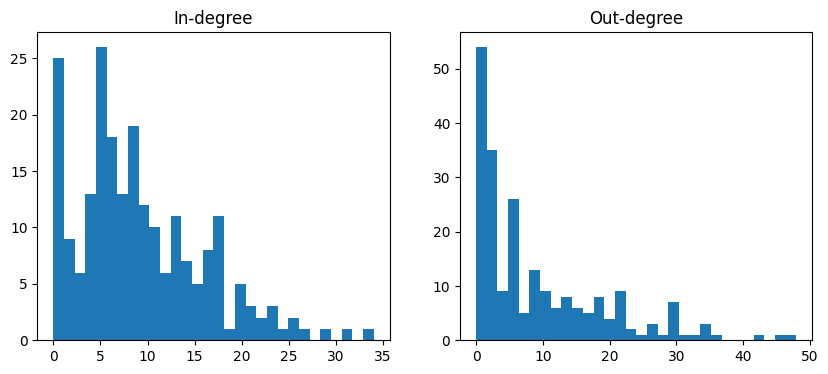

GWCC: 220,  1.000 of firms
GSCC: 177,  0.805 of firms
Degree assortativity: -0.081
Average clustering coef:  0.172


In [3]:
# want to have long-tailed degree distribution, disassortivity, clustering not too high
get_stats_on_firm_network(inputs2supplier)

# Test firm actions

In [4]:
inventories, curr_orders, exog_supp = generate_initial_conditions(firms, products, firm2idx, prod2idx,
                                                                  prod_graph, prod2firms, init_inv=3)

In [5]:
print_curr_orders(curr_orders, firms, products)

consumer ordered 1.00000 of product69 from firm22
consumer ordered 1.00000 of product64 from firm23
consumer ordered 1.00000 of product65 from firm35
consumer ordered 1.00000 of product69 from firm46
consumer ordered 1.00000 of product21 from firm50
consumer ordered 1.00000 of product21 from firm56
consumer ordered 1.00000 of product21 from firm68
consumer ordered 1.00000 of product69 from firm69
consumer ordered 1.00000 of product64 from firm82
consumer ordered 1.00000 of product21 from firm88



In [6]:
exog_supp

{('firm220', 'product25'): 100,
 ('firm28', 'product25'): 100,
 ('firm65', 'product25'): 100,
 ('firm218', 'product25'): 100,
 ('firm12', 'product25'): 100,
 ('firm119', 'product57'): 100,
 ('firm37', 'product57'): 100,
 ('firm294', 'product57'): 100,
 ('firm121', 'product57'): 100,
 ('firm172', 'product57'): 100,
 ('firm100', 'product57'): 100,
 ('firm234', 'product57'): 100,
 ('firm123', 'product57'): 100,
 ('firm292', 'product20'): 100,
 ('firm182', 'product20'): 100,
 ('firm161', 'product20'): 100,
 ('firm254', 'product20'): 100,
 ('firm220', 'product20'): 100,
 ('firm42', 'product5'): 100,
 ('firm232', 'product5'): 100,
 ('firm279', 'product5'): 100,
 ('firm213', 'product5'): 100,
 ('firm148', 'product5'): 100,
 ('firm140', 'product5'): 100,
 ('firm262', 'product5'): 100,
 ('firm147', 'product5'): 100,
 ('firm121', 'product5'): 100,
 ('firm55', 'product5'): 100,
 ('firm142', 'product5'): 100,
 ('firm81', 'product40'): 100,
 ('firm111', 'product40'): 100,
 ('firm56', 'product40'): 

In [8]:
out = simulate_actions_for_firm('firm22', inventories, curr_orders, exog_supp,  # time-varying info
                              firms, products, firm2idx, prod2idx,  # nodes + indexing
                              prod_graph, firm2prods, prod2firms, inputs2supplier,  # static graphs
                              debug=True)

Processing product3
No orders for firm+product, skipping
Processing product69
Before processing...
orders for firm+product {'consumer': 1.0}
inputs needed by firm {}
inputs for product {'product45': 1, 'product0': 4, 'product46': 3, 'product29': 4}
Based on product45, could make 3.00 of product69
Based on product0, could make 0.75 of product69
Based on product46, could make 1.00 of product69
Based on product29, could make 0.75 of product69
Amount ordered: 1.00; Amount made: 0.75
After processing...
orders for firm+product {'consumer': 0.25}
inputs needed by firm {'product46': 0.75, 'product45': 0.25, 'product0': 1.0, 'product29': 1.0}


In [9]:
# check that modifications weren't in place
out = simulate_actions_for_firm('firm22', inventories, curr_orders, exog_supp,  # time-varying info
                              firms, products, firm2idx, prod2idx,  # nodes + indexing
                              prod_graph, firm2prods, prod2firms, inputs2supplier,  # static graphs
                              debug=True)

Processing product3
No orders for firm+product, skipping
Processing product69
Before processing...
orders for firm+product {'consumer': 1.0}
inputs needed by firm {}
inputs for product {'product45': 1, 'product0': 4, 'product46': 3, 'product29': 4}
Based on product45, could make 3.00 of product69
Based on product0, could make 0.75 of product69
Based on product46, could make 1.00 of product69
Based on product29, could make 0.75 of product69
Amount ordered: 1.00; Amount made: 0.75
After processing...
orders for firm+product {'consumer': 0.25}
inputs needed by firm {'product46': 0.75, 'product45': 0.25, 'product0': 1.0, 'product29': 1.0}


# Test full simulation

In [24]:
# one-time demand, "infinite" exogenous supply - simulation should end early
# also test random order for firms
inventories, curr_orders, exog_supp = generate_initial_conditions(firms, products, firm2idx, prod2idx,
                                                                  prod_graph, prod2firms, init_inv=0, 
                                                                  init_demand=1., init_supply=100000)
num_timesteps = 100
transactions = generate_transactions(num_timesteps, inventories, curr_orders, exog_supp,  # time-varying info
                          firms, products, firm2idx, prod2idx,  # nodes + indexing
                          prod_graph, firm2prods, prod2firms, inputs2supplier,  # static graphs
                          debug=False, use_random_firm_order=True)

['firm249' 'firm68' 'firm260' 'firm58' 'firm165' 'firm122' 'firm149'
 'firm155' 'firm82' 'firm232']
t=0: generated 0 transactions, 152 current orders
['firm117' 'firm263' 'firm238' 'firm279' 'firm170' 'firm97' 'firm27'
 'firm47' 'firm4' 'firm162']
t=1: generated 0 transactions, 435 current orders
['firm285' 'firm179' 'firm23' 'firm149' 'firm159' 'firm22' 'firm227'
 'firm156' 'firm262' 'firm291']
t=2: generated 0 transactions, 1196 current orders
['firm155' 'firm231' 'firm136' 'firm6' 'firm271' 'firm105' 'firm115'
 'firm257' 'firm28' 'firm120']
t=3: generated 761 transactions, 435 current orders
['firm261' 'firm238' 'firm203' 'firm251' 'firm254' 'firm4' 'firm59'
 'firm75' 'firm52' 'firm286']
t=4: generated 283 transactions, 152 current orders
['firm74' 'firm198' 'firm102' 'firm88' 'firm29' 'firm23' 'firm108'
 'firm250' 'firm106' 'firm51']
t=5: generated 122 transactions, 30 current orders
['firm130' 'firm176' 'firm148' 'firm197' 'firm244' 'firm91' 'firm133'
 'firm294' 'firm234' 'firm122

In [25]:
# different random order for firms should produce the same results
inventories, curr_orders, exog_supp = generate_initial_conditions(firms, products, firm2idx, prod2idx,
                                                                  prod_graph, prod2firms, init_inv=0, 
                                                                  init_demand=1., init_supply=100000)
num_timesteps = 100
transactions2 = generate_transactions(num_timesteps, inventories, curr_orders, exog_supp,  # time-varying info
                          firms, products, firm2idx, prod2idx,  # nodes + indexing
                          prod_graph, firm2prods, prod2firms, inputs2supplier,  # static graphs
                          debug=False, use_random_firm_order=True)

['firm28' 'firm108' 'firm155' 'firm112' 'firm56' 'firm100' 'firm163'
 'firm180' 'firm152' 'firm233']
t=0: generated 0 transactions, 152 current orders
['firm145' 'firm219' 'firm122' 'firm211' 'firm56' 'firm88' 'firm121'
 'firm63' 'firm105' 'firm201']
t=1: generated 0 transactions, 435 current orders
['firm197' 'firm117' 'firm116' 'firm171' 'firm41' 'firm182' 'firm154'
 'firm276' 'firm274' 'firm65']
t=2: generated 0 transactions, 1196 current orders
['firm165' 'firm291' 'firm16' 'firm3' 'firm160' 'firm10' 'firm47'
 'firm156' 'firm298' 'firm86']
t=3: generated 761 transactions, 435 current orders
['firm249' 'firm162' 'firm215' 'firm186' 'firm294' 'firm18' 'firm59'
 'firm120' 'firm158' 'firm261']
t=4: generated 283 transactions, 152 current orders
['firm32' 'firm41' 'firm30' 'firm137' 'firm108' 'firm111' 'firm165'
 'firm47' 'firm216' 'firm12']
t=5: generated 122 transactions, 30 current orders
['firm216' 'firm3' 'firm257' 'firm222' 'firm108' 'firm137' 'firm116'
 'firm232' 'firm8' 'firm67'

In [26]:
transactions.head()

supplier_id  buyer_id  product_id  amount  time
0            4        33           7   148.0     3
1            4        60           7    72.0     3
2            4        84           7    24.0     3
3            4       106           7    52.0     3
4            4       139           9    16.0     3

In [27]:
transactions2.head()

supplier_id  buyer_id  product_id  amount  time
0           11       106           0    64.0     3
1           11       139           0    48.0     3
2           11       160           0    14.0     3
3           11        39           4    48.0     3
4           11        80           4    28.0     3

In [28]:
transactions = transactions.sort_values(by=['time', 'supplier_id', 'buyer_id', 'product_id', 'amount'])
transactions.head()

supplier_id  buyer_id  product_id  amount  time
84             0        49           8    16.0     3
85             0        70           8    24.0     3
86             0        99           8    72.0     3
87             0       208           8    24.0     3
211            2        11          19    24.0     3

In [29]:
transactions2 = transactions2.sort_values(by=['time', 'supplier_id', 'buyer_id', 'product_id', 'amount'])
transactions2.head()

supplier_id  buyer_id  product_id  amount  time
72             0        49           8    16.0     3
73             0        70           8    24.0     3
74             0        99           8    72.0     3
75             0       208           8    24.0     3
532            2        11          19    24.0     3

In [30]:
# check transactions are equivalent
for col in ['time', 'supplier_id', 'buyer_id', 'product_id', 'amount']:
    assert np.isclose(transactions[col].values, transactions2[col].values).all()

In [31]:
# this product is exog
exog_supp[(firms[0], products[8])]

100000

In [32]:
# firm id=49 received a bunch of inputs at time 3
transactions[(transactions.buyer_id == 49)]

supplier_id  buyer_id  product_id  amount  time
84             0        49           8    16.0     3
438           21        49          13    48.0     3
371           28        49          17    48.0     3
381           28        49          23    48.0     3
341           92        49          18    32.0     3
338          126        49          19    16.0     3
544          173        49          22    16.0     3

In [33]:
# firm id=49 sold product id=69 at time 4
transactions[(transactions.supplier_id == 49)]

supplier_id  buyer_id  product_id  amount  time
601           49        62          20     8.0     3
602           49        70          20    32.0     3
603           49       145          20    16.0     3
604           49       164          20    48.0     3
605           49       219          20    64.0     3
137           49       101          69    16.0     4

In [34]:
# check input products for product id=69
# should come from the list of products that firm id=49 received at time 3
for s in prod_graph[prod_graph['dest'] == products[69]]['source'].values:
    print(prod2idx[s])

8
13
17
18
19
22
23


In [35]:
# try with demand schedule
inventories, curr_orders, exog_supp = generate_initial_conditions(firms, products, firm2idx, prod2idx,
                                                                  prod_graph, prod2firms, init_inv=0, 
                                                                  init_demand=1., init_supply=100000)
num_timesteps = 100
demand_schedule = generate_demand_schedule(num_timesteps, prod_graph, prod2firms)
transactions = generate_transactions(num_timesteps, inventories, curr_orders, exog_supp,  # time-varying info
                          firms, products, firm2idx, prod2idx,  # nodes + indexing
                          prod_graph, firm2prods, prod2firms, inputs2supplier,  # static graphs
                          demand_schedule=demand_schedule, debug=False)

Finished generating demand schedule: Counter({'weekend': 2, 'weekday': 2, 'uniform': 1})
t=0: generated 0 transactions, 152 current orders
t=1: generated 0 transactions, 435 current orders
t=2: generated 0 transactions, 1196 current orders
t=3: generated 761 transactions, 1038 current orders
t=4: generated 880 transactions, 1031 current orders
t=5: generated 949 transactions, 969 current orders
t=6: generated 886 transactions, 1031 current orders
t=7: generated 939 transactions, 1026 current orders
t=8: generated 944 transactions, 995 current orders
t=9: generated 912 transactions, 1069 current orders
t=10: generated 964 transactions, 998 current orders
t=11: generated 920 transactions, 1052 current orders
t=12: generated 964 transactions, 1063 current orders
t=13: generated 982 transactions, 1052 current orders
t=14: generated 975 transactions, 1118 current orders
t=15: generated 1040 transactions, 1106 current orders
t=16: generated 1041 transactions, 1053 current orders
t=17: genera

In [36]:
# product id=99 is a consumer product
layers = get_supply_chain_for_product(products[99], prod_graph)
for li, l in enumerate(layers):
    print(f'Tier {li}: {len(l)} products,', l)

Tier 0: 1 products, {'product64'}
Tier 1: 4 products, {'product11', 'product39', 'product68', 'product71'}
Tier 2: 14 products, {'product9', 'product76', 'product89', 'product70', 'product16', 'product26', 'product78', 'product31', 'product49', 'product60', 'product13', 'product42', 'product48', 'product38'}
Tier 3: 24 products, {'product25', 'product4', 'product57', 'product53', 'product23', 'product1', 'product20', 'product5', 'product40', 'product99', 'product12', 'product56', 'product88', 'product27', 'product85', 'product30', 'product91', 'product62', 'product80', 'product79', 'product67', 'product36', 'product86', 'product61'}


True sources (layer 2): ['product48']
SUPPLIER: firm222
Never supplied product11 in transactions; skipping
SUPPLIER: firm7
src=product48: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
Found 7 OTHER products bought by firm7


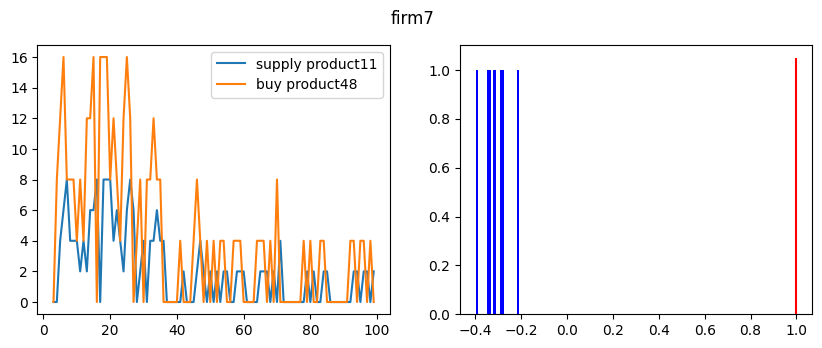

SUPPLIER: firm135
Never supplied product11 in transactions; skipping
SUPPLIER: firm246
src=product48: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm


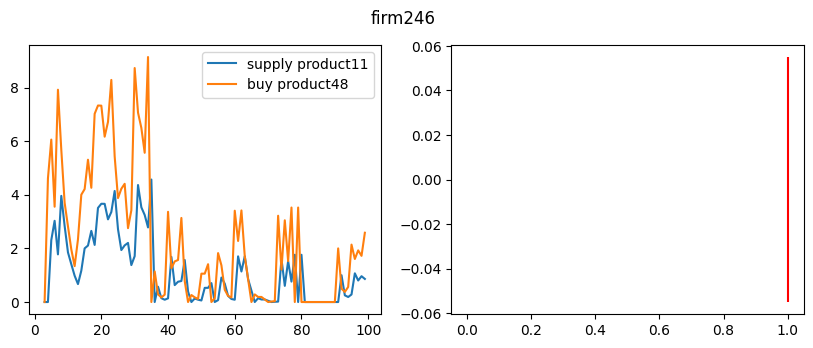

SUPPLIER: firm198
Never supplied product11 in transactions; skipping
SUPPLIER: firm157
src=product48: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
Found 12 OTHER products bought by firm157


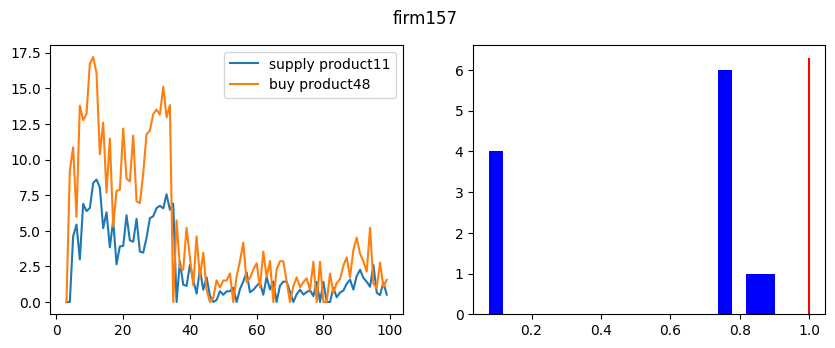

SUPPLIER: firm171
Never supplied product11 in transactions; skipping
SUPPLIER: firm272
Never supplied product11 in transactions; skipping
SUPPLIER: firm166
Never supplied product11 in transactions; skipping
SUPPLIER: firm124
src=product48: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
Found 10 OTHER products bought by firm124


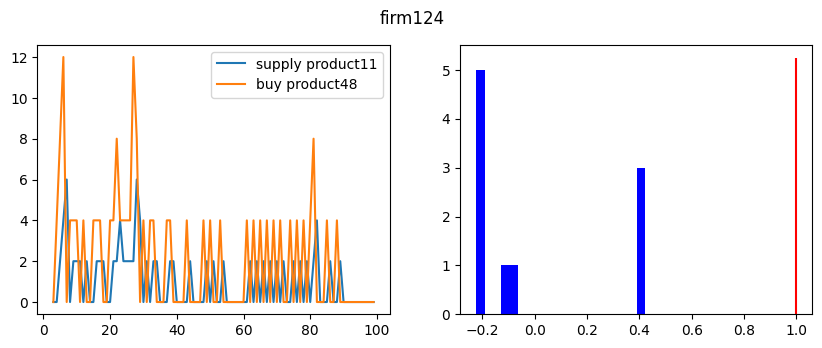

SUPPLIER: firm209
src=product48: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
Found 5 OTHER products bought by firm209


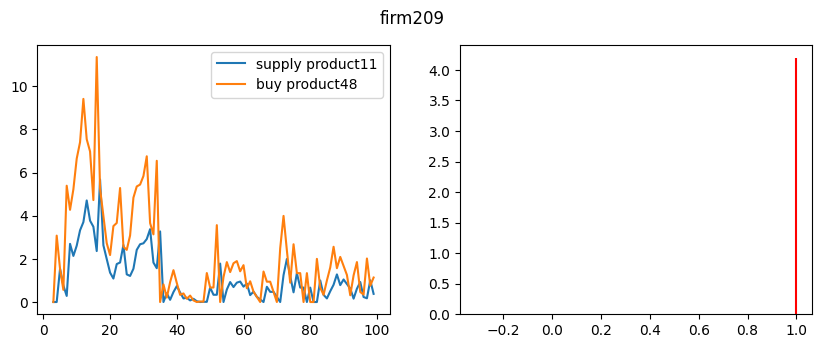

SUPPLIER: firm107
src=product48: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
Found 16 OTHER products bought by firm107


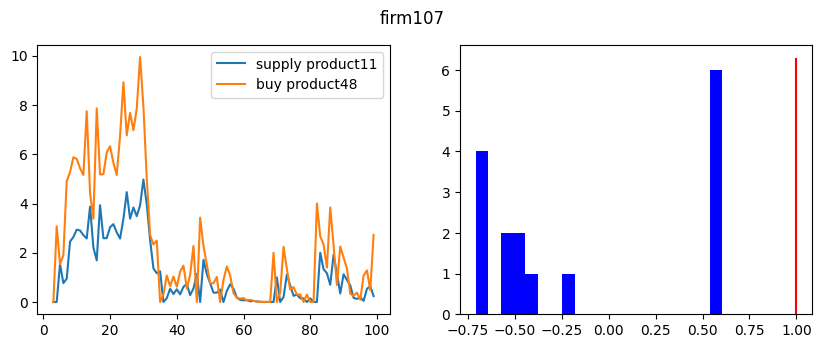

{(1, 2, 1): [1.0,
  0.9999999999993426,
  0.9999999999998357,
  0.9999999999999999,
  0.9999999999992983,
  0.9999999999994255]}

In [39]:
eval_timeseries_for_product('product11', transactions, firms, products, firm2idx, prod2idx,
                            prod_graph, firm2prods, prod2firms)

True sources (layer 2): ['product16', 'product26', 'product31', 'product78']
SUPPLIER: firm67
Never supplied product39 in transactions; skipping
SUPPLIER: firm274
Never supplied product39 in transactions; skipping
SUPPLIER: firm12
src=product16: best corr = 0.837, lag = 1; input to 1 product(s) supplied by firm
src=product26: best corr = 0.935, lag = 1; input to 1 product(s) supplied by firm
src=product31: best corr = 0.935, lag = 1; input to 1 product(s) supplied by firm
src=product78: best corr = 0.955, lag = 1; input to 1 product(s) supplied by firm


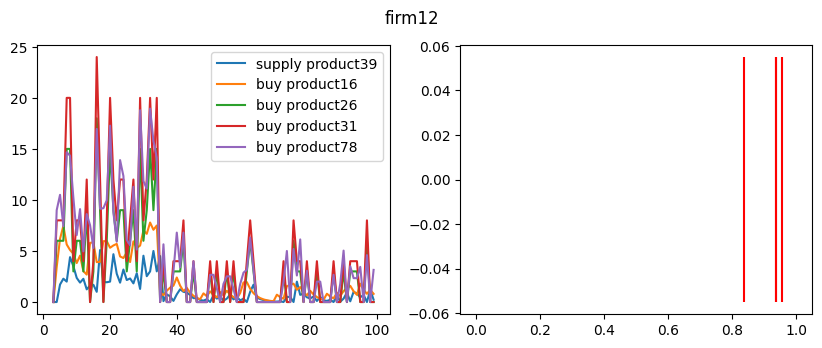

SUPPLIER: firm104
src=product16: best corr = 0.805, lag = 3; input to 1 product(s) supplied by firm
src=product26: best corr = 0.888, lag = 1; input to 1 product(s) supplied by firm
src=product31: best corr = 0.888, lag = 1; input to 1 product(s) supplied by firm
src=product78: best corr = 0.840, lag = 1; input to 1 product(s) supplied by firm


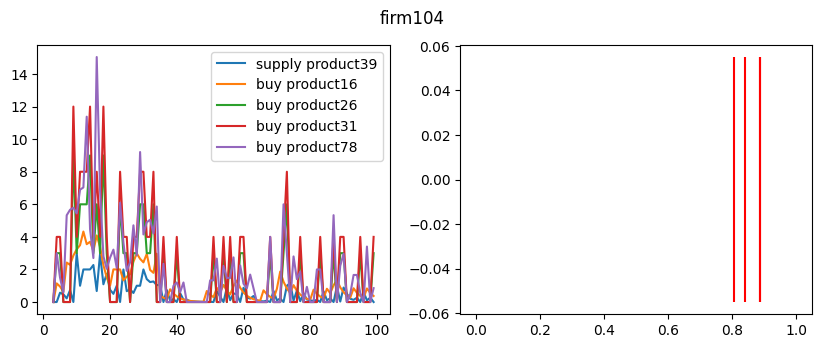

SUPPLIER: firm30
Never supplied product39 in transactions; skipping
SUPPLIER: firm138
src=product16: best corr = 0.912, lag = 1; input to 1 product(s) supplied by firm
src=product26: best corr = 0.930, lag = 1; input to 1 product(s) supplied by firm
src=product31: best corr = 0.930, lag = 1; input to 1 product(s) supplied by firm
src=product78: best corr = 0.950, lag = 1; input to 1 product(s) supplied by firm
Found 6 OTHER products bought by firm138


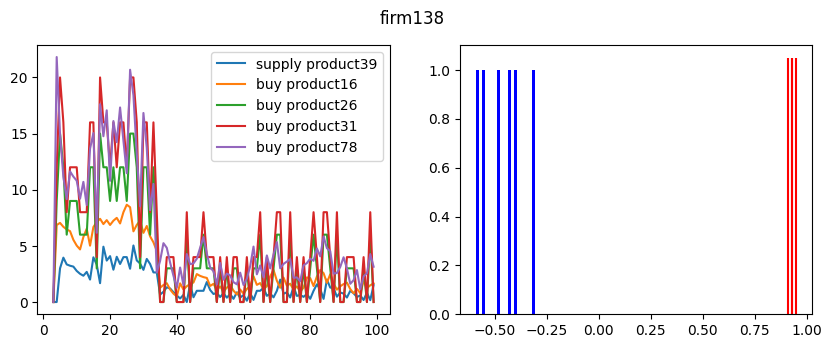

SUPPLIER: firm244
src=product16: best corr = 0.549, lag = 5; input to 1 product(s) supplied by firm
src=product26: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product31: best corr = 0.558, lag = 4; input to 1 product(s) supplied by firm
src=product78: best corr = 0.576, lag = 4; input to 1 product(s) supplied by firm
Found 10 OTHER products bought by firm244


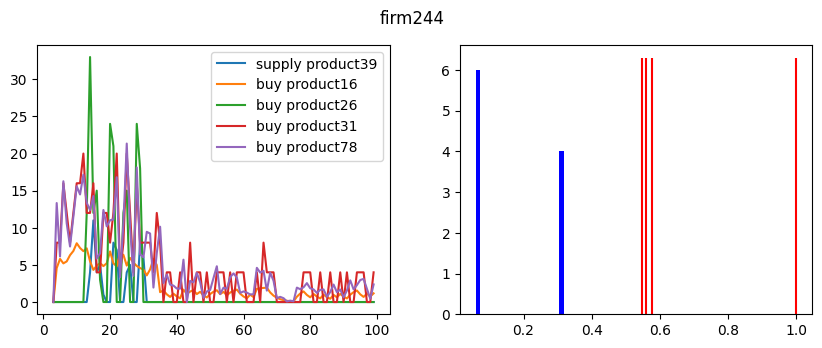

{(4, 2, 1): [0.8371991174670801,
  0.9349557508023791,
  0.9349557522873054,
  0.9546821010262465,
  0.8049894968727516,
  0.8878260075695452,
  0.8878259756686842,
  0.8402791221739062,
  0.9122465984792836,
  0.9297711456002056,
  0.9297711370640784,
  0.9502160630215032,
  0.5486436760046787,
  0.999999999999985,
  0.5577447493897101,
  0.5763140173573565]}

In [40]:
eval_timeseries_for_product('product39', transactions, firms, products, firm2idx, prod2idx,
                            prod_graph, firm2prods, prod2firms)

True sources (layer 2): ['product13', 'product42', 'product60', 'product76', 'product89', 'product9']
SUPPLIER: firm162
Never supplied product68 in transactions; skipping
SUPPLIER: firm16
src=product13: best corr = 0.879, lag = 1; input to 1 product(s) supplied by firm
src=product42: best corr = 0.898, lag = 1; input to 1 product(s) supplied by firm
src=product60: best corr = 0.879, lag = 1; input to 1 product(s) supplied by firm
src=product76: best corr = 0.879, lag = 1; input to 1 product(s) supplied by firm
src=product89: best corr = 0.868, lag = 1; input to 1 product(s) supplied by firm
src=product9: best corr = 0.879, lag = 1; input to 1 product(s) supplied by firm
Found 4 OTHER products bought by firm16


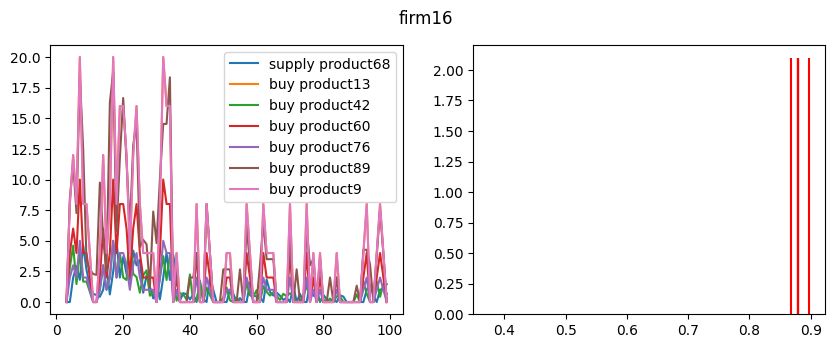

SUPPLIER: firm32
src=product13: best corr = 0.936, lag = 1; input to 1 product(s) supplied by firm
src=product42: best corr = 0.932, lag = 1; input to 1 product(s) supplied by firm
src=product60: best corr = 0.932, lag = 1; input to 1 product(s) supplied by firm
src=product76: best corr = 0.878, lag = 1; input to 1 product(s) supplied by firm
src=product89: best corr = 0.936, lag = 1; input to 1 product(s) supplied by firm
src=product9: best corr = 0.932, lag = 1; input to 1 product(s) supplied by firm


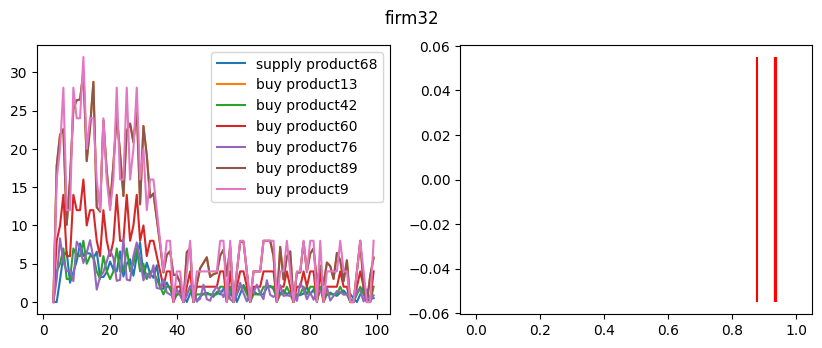

SUPPLIER: firm181
Never supplied product68 in transactions; skipping
SUPPLIER: firm218
Never supplied product68 in transactions; skipping
SUPPLIER: firm74
src=product13: best corr = 0.884, lag = 1; input to 1 product(s) supplied by firm
src=product42: best corr = 0.772, lag = 1; input to 1 product(s) supplied by firm
src=product60: best corr = 0.885, lag = 1; input to 1 product(s) supplied by firm
src=product76: best corr = 0.800, lag = 3; input to 1 product(s) supplied by firm
src=product89: best corr = 0.884, lag = 1; input to 1 product(s) supplied by firm
src=product9: best corr = 0.871, lag = 1; input to 1 product(s) supplied by firm
Found 4 OTHER products bought by firm74


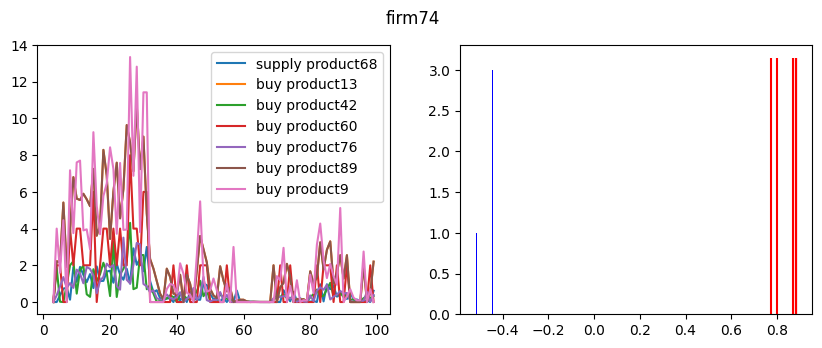

SUPPLIER: firm291
src=product13: best corr = 0.832, lag = 1; input to 1 product(s) supplied by firm
src=product42: best corr = 0.832, lag = 1; input to 1 product(s) supplied by firm
src=product60: best corr = 0.832, lag = 1; input to 1 product(s) supplied by firm
src=product76: best corr = 0.832, lag = 1; input to 1 product(s) supplied by firm
src=product89: best corr = 0.880, lag = 1; input to 1 product(s) supplied by firm
src=product9: best corr = 0.907, lag = 1; input to 1 product(s) supplied by firm
Found 7 OTHER products bought by firm291


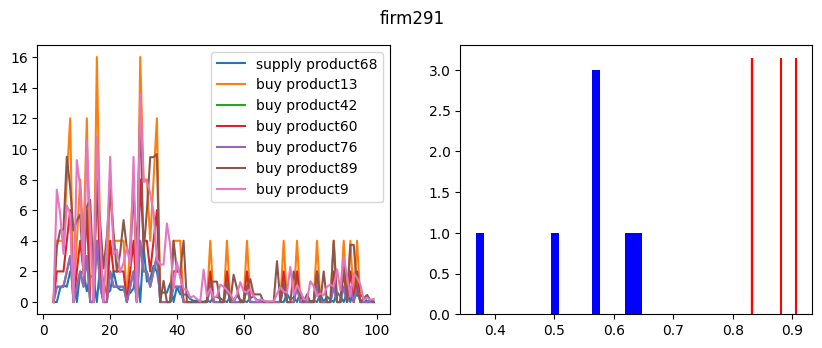

{(6, 2, 1): [0.8790010203019618,
  0.8979384898721428,
  0.8790010158989323,
  0.8790011238146538,
  0.868271835930235,
  0.8790010203019618,
  0.9355915210197541,
  0.9322025441698898,
  0.9322025029208312,
  0.8782379741593367,
  0.9355915210197541,
  0.9322025059778956,
  0.8842750057745501,
  0.7724448035477893,
  0.8847190797568469,
  0.8000893001247743,
  0.8842750057745501,
  0.8713082633079863,
  0.8322008851127305,
  0.8322006881851007,
  0.8322008929337391,
  0.8322006881851007,
  0.8803731602506631,
  0.9068599634183252]}

In [41]:
eval_timeseries_for_product('product68', transactions, firms, products, firm2idx, prod2idx,
                            prod_graph, firm2prods, prod2firms)

True sources (layer 1): ['product80', 'product91']
SUPPLIER: firm296
src=product80: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product91: best corr = 0.986, lag = 1; input to 2 product(s) supplied by firm
Found 2 OTHER products bought by firm296


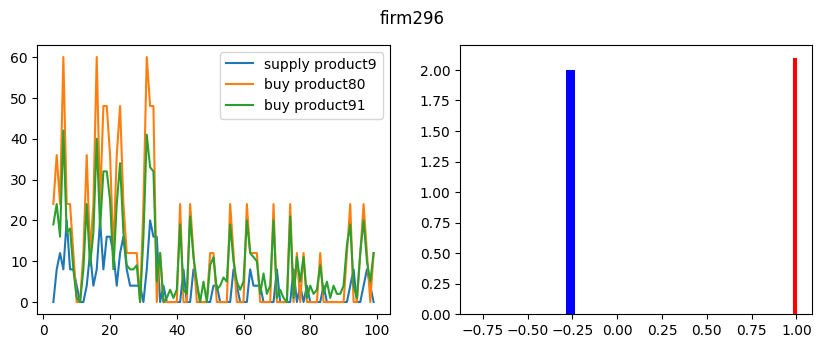

SUPPLIER: firm73
Never supplied product9 in transactions; skipping
SUPPLIER: firm33
src=product80: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product91: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm


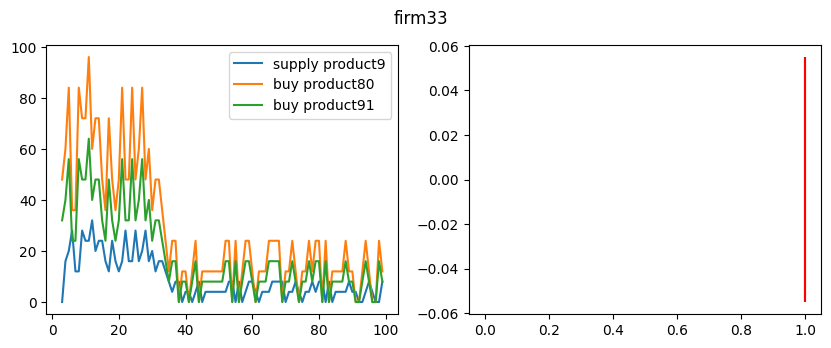

SUPPLIER: firm285
src=product80: best corr = 0.994, lag = 1; input to 2 product(s) supplied by firm
src=product91: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
Found 5 OTHER products bought by firm285


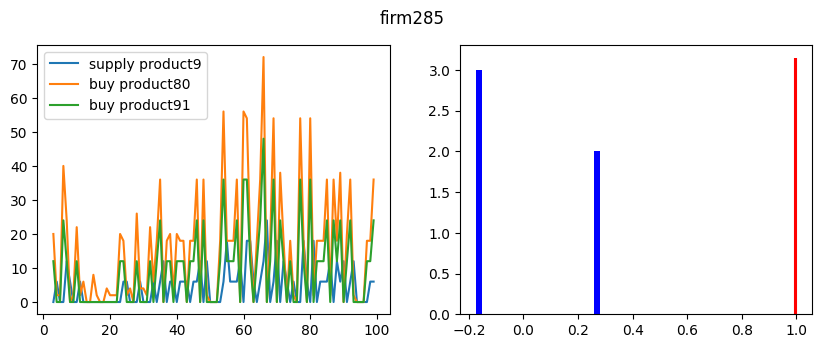

SUPPLIER: firm69
src=product80: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product91: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
Found 9 OTHER products bought by firm69


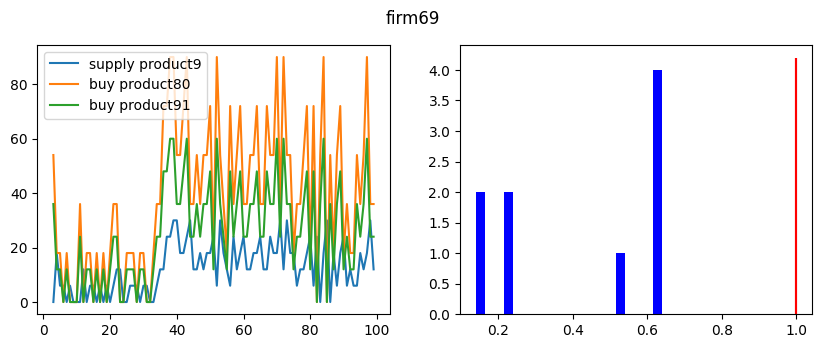

SUPPLIER: firm205
src=product80: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product91: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm


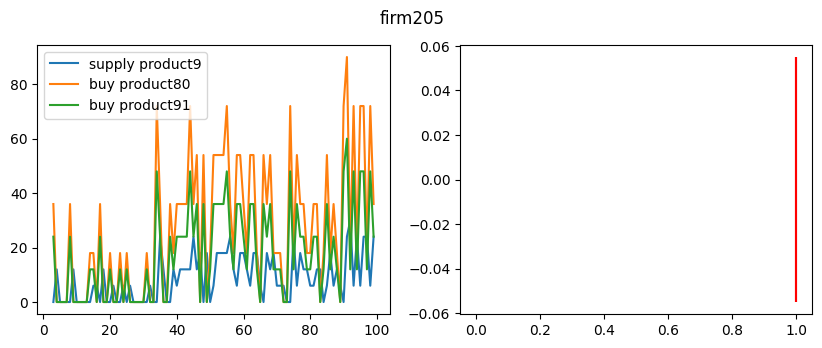

SUPPLIER: firm17
src=product80: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product91: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
Found 6 OTHER products bought by firm17


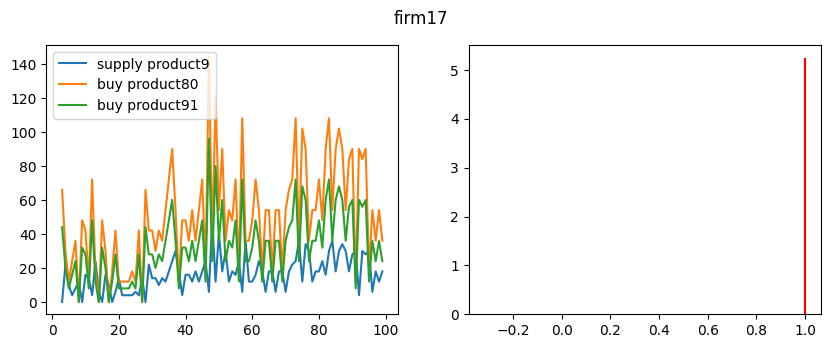

SUPPLIER: firm218
src=product80: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product91: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
Found 4 OTHER products bought by firm218


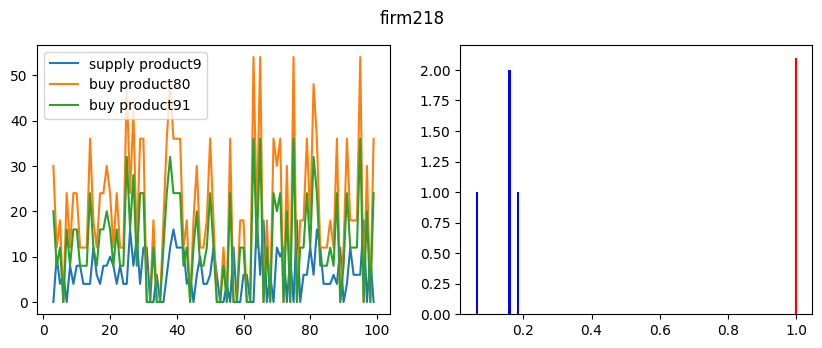

{(2, 1, 1): [1.0,
  1.0,
  0.9999999999999999,
  0.9999999999999999,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9999999999999999,
  0.9999999999999998,
  1.0,
  1.0],
 (2, 1, 2): [0.9859218523578561, 0.9943045912310127]}

In [42]:
eval_timeseries_for_product('product9', transactions, firms, products, firm2idx, prod2idx,
                            prod_graph, firm2prods, prod2firms)

True sources (layer 1): ['product1', 'product20', 'product27', 'product53', 'product85', 'product86']
SUPPLIER: firm107
src=product1: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product20: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product27: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product53: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product85: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product86: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
Found 11 OTHER products bought by firm107


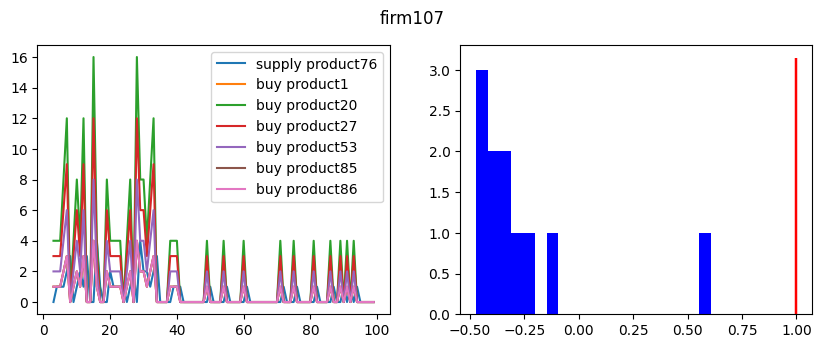

SUPPLIER: firm192
Never supplied product76 in transactions; skipping
SUPPLIER: firm191
Never supplied product76 in transactions; skipping
SUPPLIER: firm244
src=product1: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product20: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product27: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product53: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product85: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product86: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
Found 8 OTHER products bought by firm244


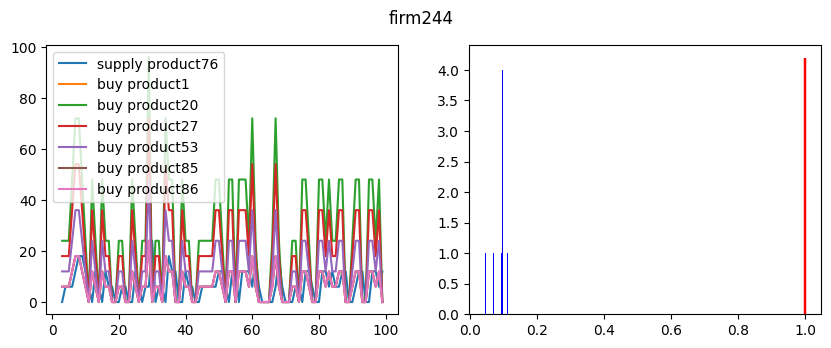

SUPPLIER: firm120
Never supplied product76 in transactions; skipping
SUPPLIER: firm8
Never supplied product76 in transactions; skipping
SUPPLIER: firm295
src=product1: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product20: best corr = 0.965, lag = 1; input to 2 product(s) supplied by firm
src=product27: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product53: best corr = 0.926, lag = 1; input to 2 product(s) supplied by firm
src=product85: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product86: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
Found 6 OTHER products bought by firm295


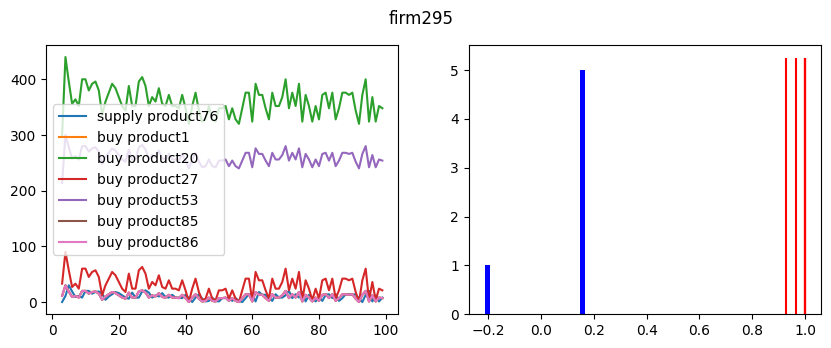

SUPPLIER: firm134
src=product1: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product20: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product27: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product53: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product85: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product86: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm


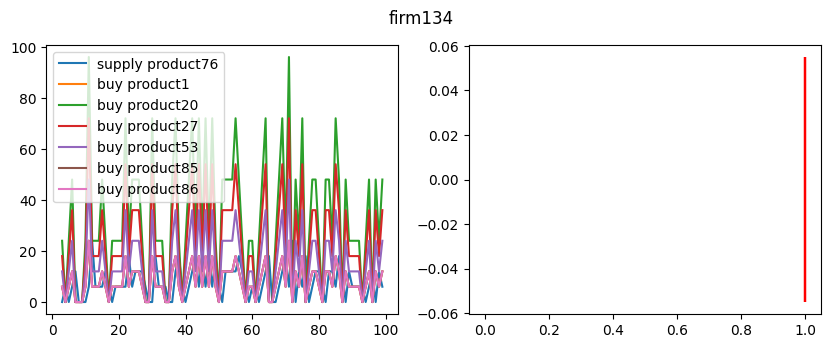

SUPPLIER: firm284
src=product1: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product20: best corr = 0.616, lag = 1; input to 2 product(s) supplied by firm
src=product27: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product53: best corr = 0.418, lag = 2; input to 2 product(s) supplied by firm
src=product85: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product86: best corr = 0.369, lag = 2; input to 2 product(s) supplied by firm
Found 9 OTHER products bought by firm284


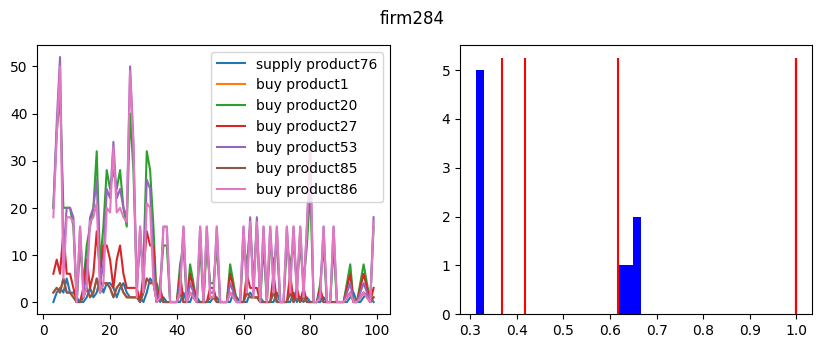

SUPPLIER: firm198
src=product1: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product20: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product27: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product53: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product85: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product86: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm


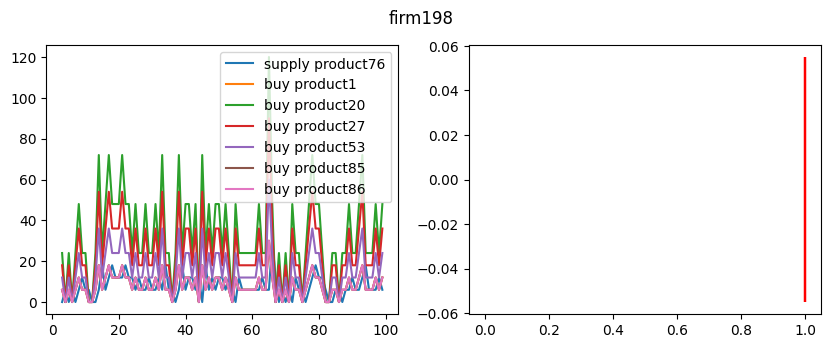

SUPPLIER: firm78
Never supplied product76 in transactions; skipping


{(6, 1, 1): [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9999999999999998,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9999999999999998,
  0.9999999999999998,
  0.9999999999999998,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 (6, 1, 2): [0.9650585687816744,
  0.9258613945074595,
  0.6164861223136335,
  0.4175176692549308,
  0.3690145028265781]}

In [43]:
eval_timeseries_for_product('product76', transactions, firms, products, firm2idx, prod2idx,
                            prod_graph, firm2prods, prod2firms)

True sources (layer 1): ['product12', 'product20', 'product23', 'product57', 'product85', 'product99']
SUPPLIER: firm102
src=product12: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product20: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product23: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product57: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product85: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product99: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm


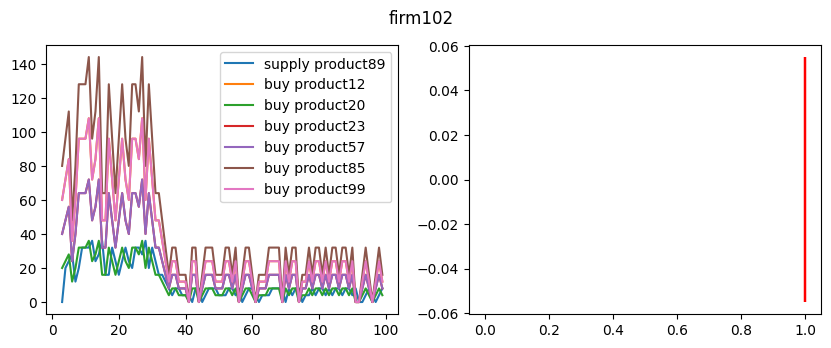

SUPPLIER: firm219
Never supplied product89 in transactions; skipping
SUPPLIER: firm202
Never supplied product89 in transactions; skipping
SUPPLIER: firm182
Never supplied product89 in transactions; skipping
SUPPLIER: firm213
src=product12: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product20: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product23: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product57: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product85: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product99: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm


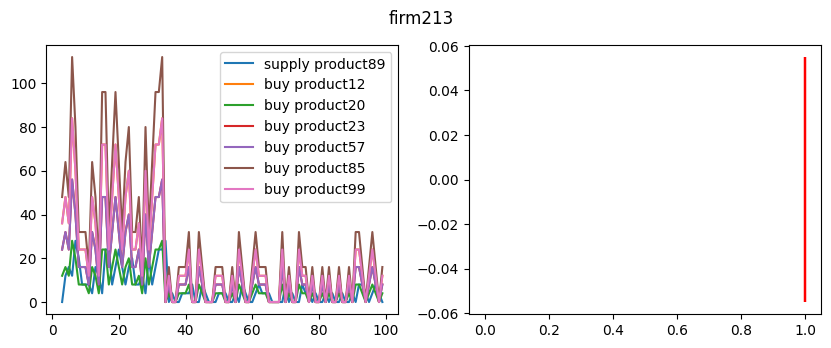

{(6, 1, 1): [0.9999999999999999,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9999999999999807,
  0.9999999999999807,
  0.9999999999999807,
  0.9999999999999807,
  0.9999999999999807,
  0.9999999999999807]}

In [44]:
eval_timeseries_for_product('product89', transactions, firms, products, firm2idx, prod2idx,
                            prod_graph, firm2prods, prod2firms)

In [45]:
exog_prods = set(prod_graph.source.values) - set(prod_graph.dest.values)
consumer_prods = set(prod_graph.dest.values) - set(prod_graph.source.values)
prods_to_check = set(products) - exog_prods - consumer_prods
print(len(prods_to_check))
prods_to_check

71


{'product0',
 'product10',
 'product11',
 'product13',
 'product14',
 'product16',
 'product17',
 'product18',
 'product19',
 'product2',
 'product22',
 'product24',
 'product26',
 'product28',
 'product29',
 'product3',
 'product31',
 'product32',
 'product33',
 'product34',
 'product35',
 'product37',
 'product38',
 'product39',
 'product41',
 'product42',
 'product43',
 'product44',
 'product45',
 'product46',
 'product47',
 'product48',
 'product49',
 'product50',
 'product51',
 'product52',
 'product54',
 'product55',
 'product58',
 'product59',
 'product6',
 'product60',
 'product63',
 'product66',
 'product68',
 'product7',
 'product70',
 'product71',
 'product72',
 'product73',
 'product74',
 'product75',
 'product76',
 'product77',
 'product78',
 'product8',
 'product81',
 'product82',
 'product83',
 'product84',
 'product87',
 'product89',
 'product9',
 'product90',
 'product92',
 'product93',
 'product94',
 'product95',
 'product96',
 'product97',
 'product98'}

In [48]:
all_conds = {}
for p in prods_to_check:
    print(f'============ PRODUCT {p} ============')
    conds = eval_timeseries_for_product(p, transactions, firms, products, firm2idx, prod2idx,
                            prod_graph, firm2prods, prod2firms, make_plots=False)
    for c in conds:
        all_conds[c] = all_conds.get(c, []) + conds[c]
    print('\n')

============ PRODUCT product9 ============
True sources (layer 1): ['product80', 'product91']
SUPPLIER: firm296
src=product80: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product91: best corr = 0.986, lag = 1; input to 2 product(s) supplied by firm
Found 2 OTHER products bought by firm296
SUPPLIER: firm73
Never supplied product9 in transactions; skipping
SUPPLIER: firm33
src=product80: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product91: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
SUPPLIER: firm285
src=product80: best corr = 0.994, lag = 1; input to 2 product(s) supplied by firm
src=product91: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
Found 5 OTHER products bought by firm285
SUPPLIER: firm69
src=product80: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product91: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
Found 9 OTHER products bought b

src=product40: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product57: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product61: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product67: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product85: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product88: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
SUPPLIER: firm216
src=product30: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product4: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product40: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product57: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product61: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product67: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm

SUPPLIER: firm79
src=product12: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
Found 4 OTHER products bought by firm79
SUPPLIER: firm41
src=product12: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
SUPPLIER: firm116
Never supplied product41 in transactions; skipping
SUPPLIER: firm286
src=product12: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
SUPPLIER: firm58
src=product12: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
Found 10 OTHER products bought by firm58
SUPPLIER: firm270
Never supplied product41 in transactions; skipping
SUPPLIER: firm160
src=product12: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
SUPPLIER: firm137
Never supplied product41 in transactions; skipping


============ PRODUCT product3 ============
True sources (layer 1): ['product12', 'product23', 'product30', 'product36', 'product40', 'product85', 'product88', 'product91']
SUPPLIER: firm89
src=product12: best corr

SUPPLIER: firm295
Never supplied product74 in transactions; skipping
SUPPLIER: firm124
src=product1: best corr = 0.962, lag = 1; input to 2 product(s) supplied by firm
src=product56: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product62: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
Found 8 OTHER products bought by firm124
SUPPLIER: firm51
src=product1: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product56: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product62: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
Found 9 OTHER products bought by firm51


============ PRODUCT product92 ============
True sources (layer 1): ['product20', 'product23', 'product27', 'product36', 'product56', 'product67', 'product88', 'product99']
SUPPLIER: firm286
Never supplied product92 in transactions; skipping
SUPPLIER: firm85
src=product20: best corr = 1.000, lag = 1; input to 1 product(s)

src=product25: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product30: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product56: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product67: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product86: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product99: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
SUPPLIER: firm107
Never supplied product81 in transactions; skipping
SUPPLIER: firm138
Never supplied product81 in transactions; skipping
SUPPLIER: firm111
Never supplied product81 in transactions; skipping
SUPPLIER: firm294
Never supplied product81 in transactions; skipping
SUPPLIER: firm55
Never supplied product81 in transactions; skipping
SUPPLIER: firm96
src=product25: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product30: best corr = 1.000, lag = 1; input to 1 product(s) 

src=product57: best corr = -0.182, lag = 1; input to 2 product(s) supplied by firm
src=product80: best corr = 0.629, lag = 1; input to 2 product(s) supplied by firm
Found 13 OTHER products bought by firm128
SUPPLIER: firm97
src=product30: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product53: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product57: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product80: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
Found 3 OTHER products bought by firm97
SUPPLIER: firm169
Never supplied product42 in transactions; skipping
SUPPLIER: firm284
Never supplied product42 in transactions; skipping
SUPPLIER: firm285
src=product30: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product53: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product57: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=pr

SUPPLIER: firm294
Never supplied product93 in transactions; skipping


============ PRODUCT product7 ============
True sources (layer 1): ['product12']
SUPPLIER: firm27
Never supplied product7 in transactions; skipping
SUPPLIER: firm234
Never supplied product7 in transactions; skipping
SUPPLIER: firm261
src=product12: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
Found 5 OTHER products bought by firm261
SUPPLIER: firm29
src=product12: best corr = -0.400, lag = 0; input to 2 product(s) supplied by firm
Found 7 OTHER products bought by firm29
SUPPLIER: firm127
Never supplied product7 in transactions; skipping
SUPPLIER: firm142
Never supplied product7 in transactions; skipping
SUPPLIER: firm170
Never supplied product7 in transactions; skipping
SUPPLIER: firm213
Never supplied product7 in transactions; skipping
SUPPLIER: firm6
src=product12: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
Found 12 OTHER products bought by firm6
SUPPLIER: firm218
Neve

SUPPLIER: firm108
Never supplied product47 in transactions; skipping


============ PRODUCT product54 ============
True sources (layer 1): ['product1', 'product12', 'product40', 'product67']
SUPPLIER: firm257
src=product1: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product12: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product40: best corr = 0.053, lag = 1; input to 2 product(s) supplied by firm
src=product67: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
Found 5 OTHER products bought by firm257
SUPPLIER: firm112
Never supplied product54 in transactions; skipping
SUPPLIER: firm69
Never supplied product54 in transactions; skipping
SUPPLIER: firm27
Never supplied product54 in transactions; skipping
SUPPLIER: firm28
src=product1: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product12: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product40: best corr = 1.000, lag 

src=product53: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product61: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product86: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
SUPPLIER: firm120
src=product20: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product4: best corr = 0.991, lag = 1; input to 2 product(s) supplied by firm
src=product53: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product61: best corr = 0.959, lag = 1; input to 2 product(s) supplied by firm
src=product86: best corr = 0.900, lag = 1; input to 2 product(s) supplied by firm
Found 6 OTHER products bought by firm120


============ PRODUCT product66 ============
True sources (layer 1): ['product23', 'product30', 'product36', 'product80', 'product88']
SUPPLIER: firm269
Never supplied product66 in transactions; skipping
SUPPLIER: firm211
src=product23: best corr = 1.000, lag = 1; input to 1 product(s

SUPPLIER: firm202
src=product22: best corr = 0.851, lag = 1; input to 1 product(s) supplied by firm
src=product34: best corr = 0.879, lag = 1; input to 1 product(s) supplied by firm
src=product41: best corr = 0.786, lag = 3; input to 1 product(s) supplied by firm
src=product49: best corr = 0.877, lag = 1; input to 1 product(s) supplied by firm
src=product74: best corr = 0.924, lag = 1; input to 1 product(s) supplied by firm
src=product78: best corr = 0.888, lag = 1; input to 1 product(s) supplied by firm
src=product95: best corr = 0.854, lag = 1; input to 1 product(s) supplied by firm
Found 11 OTHER products bought by firm202
SUPPLIER: firm7
src=product22: best corr = 0.747, lag = 3; input to 1 product(s) supplied by firm
src=product34: best corr = 0.761, lag = 1; input to 1 product(s) supplied by firm
src=product41: best corr = 0.888, lag = 1; input to 1 product(s) supplied by firm
src=product49: best corr = 0.895, lag = 1; input to 1 product(s) supplied by firm
src=product74: best co

src=product1: best corr = 0.956, lag = 1; input to 2 product(s) supplied by firm
src=product23: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product25: best corr = -0.192, lag = 1; input to 2 product(s) supplied by firm
src=product36: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product4: best corr = -0.051, lag = 1; input to 2 product(s) supplied by firm
src=product61: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product86: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
Found 13 OTHER products bought by firm137


============ PRODUCT product13 ============
True sources (layer 1): ['product36', 'product5', 'product57', 'product79']
SUPPLIER: firm232
Never supplied product13 in transactions; skipping
SUPPLIER: firm257
Never supplied product13 in transactions; skipping
SUPPLIER: firm45
src=product36: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product5: best corr =



============ PRODUCT product82 ============
True sources (layer 1): ['product12', 'product25', 'product27', 'product30', 'product91']
SUPPLIER: firm202
src=product12: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product25: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product27: best corr = 0.735, lag = 1; input to 2 product(s) supplied by firm
src=product30: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product91: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
Found 13 OTHER products bought by firm202
SUPPLIER: firm82
Never supplied product82 in transactions; skipping
SUPPLIER: firm10
Never supplied product82 in transactions; skipping
SUPPLIER: firm37
Never supplied product82 in transactions; skipping
SUPPLIER: firm33
Never supplied product82 in transactions; skipping
SUPPLIER: firm93
src=product12: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product25: best cor

src=product85: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product86: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
Found 6 OTHER products bought by firm295
SUPPLIER: firm134
src=product1: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product20: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product27: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product53: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product85: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product86: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
SUPPLIER: firm284
src=product1: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product20: best corr = 0.616, lag = 1; input to 2 product(s) supplied by firm
src=product27: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product53: best cor

src=product61: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product67: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product88: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product91: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product99: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
Found 7 OTHER products bought by firm157


============ PRODUCT product28 ============
True sources (layer 1): ['product12', 'product20', 'product30', 'product36', 'product79', 'product85', 'product86']
SUPPLIER: firm162
Never supplied product28 in transactions; skipping
SUPPLIER: firm82
src=product12: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product20: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product30: best corr = 1.000, lag = 1; input to 1 product(s) supplied by firm
src=product36: best corr = 1.000, lag = 1; input to 1 p

In [49]:
# characterize when temporal correlations work better or worse
# len(true_sources), num_layers[0], len(dest_prods_supplied_by_s)
sorted_conditions = sorted(all_conds.keys(), key=lambda x: -np.mean(all_conds[x]))
for c in sorted_conditions:
    corrs = all_conds[c]
    if len(corrs) >= 5:
        print(f'num sources = {c[0]}, layer = {c[1]}, overlap = {c[2]} -> num examples = {len(corrs)}, mean corr = {np.mean(corrs): 0.3f}, perfect corr = {np.isclose(corrs, 1).all()}')

num sources = 2, layer = 1, overlap = 1 -> num examples = 42, mean corr =  1.000, perfect corr = True
num sources = 1, layer = 1, overlap = 1 -> num examples = 23, mean corr =  1.000, perfect corr = True
num sources = 4, layer = 1, overlap = 1 -> num examples = 74, mean corr =  1.000, perfect corr = True
num sources = 3, layer = 1, overlap = 1 -> num examples = 40, mean corr =  1.000, perfect corr = True
num sources = 7, layer = 1, overlap = 1 -> num examples = 126, mean corr =  1.000, perfect corr = True
num sources = 1, layer = 2, overlap = 1 -> num examples = 14, mean corr =  1.000, perfect corr = True
num sources = 5, layer = 1, overlap = 1 -> num examples = 164, mean corr =  0.991, perfect corr = False
num sources = 6, layer = 1, overlap = 1 -> num examples = 117, mean corr =  0.974, perfect corr = False
num sources = 2, layer = 2, overlap = 1 -> num examples = 19, mean corr =  0.946, perfect corr = False
num sources = 8, layer = 1, overlap = 1 -> num examples = 126, mean corr =  

In [76]:
import pickle 

with open('./synthetic_data.pkl', 'wb') as f:
    pickle.dump((firms, products, prod_graph, firm2prods, prod2firms, inputs2supplier, demand_schedule), f)
transactions.to_csv('./standard_setting_all_transactions.csv', index=False)

In [86]:
# randomly drop 20% of transactions
to_keep = int(np.round(len(transactions) * 0.8))
kept_transactions = transactions.sample(n=to_keep, replace=False, random_state=0, ignore_index=False).sort_index()
kept_transactions.to_csv('standard_setting_08_transactions.csv', index=False)
kept_transactions.head()

supplier_id  buyer_id  product_id  amount  time
0            0        49           8    16.0     3
1            0        70           8    24.0     3
3            0       208           8    24.0     3
4            2        28          15     6.0     3
5            2        56          15     4.0     3

In [36]:
# randomly drop 50% of transactions
to_keep = int(np.round(len(transactions) * 0.5))
kept_transactions = transactions.sample(n=to_keep, replace=False, random_state=0, ignore_index=False).sort_index()
kept_transactions.to_csv('standard_setting_05_transactions.csv', index=False)
kept_transactions.head()

supplier_id  buyer_id  product_id  amount  time
1            0        70           8    24.0     3
3            0       208           8    24.0     3
4            2        28          15     6.0     3
5            2        56          15     4.0     3
6            2        62          15     4.0     3

In [99]:
# randomly drop 10% of firms -> approximately keeps 81% of transactions (both firms need to be present)
n_firms = int(np.round(len(firms) * 0.9))
np.random.seed(0)
firms_to_keep = np.random.choice(firms, size=n_firms, replace=False)
f_idx_to_keep = [firm2idx[f] for f in firms_to_keep]
kept_transactions = transactions[(transactions.supplier_id.isin(f_idx_to_keep)) & (transactions.buyer_id.isin(f_idx_to_keep))]
print('Num transactions kept:', len(kept_transactions))
kept_transactions.to_csv('standard_setting_09_firms.csv', index=False)
kept_transactions.head()

Num transactions kept: 80952


supplier_id  buyer_id  product_id  amount  time
0            0        49           8    16.0     3
2            0        99           8    72.0     3
4            2        28          15     6.0     3
5            2        56          15     4.0     3
6            2        62          15     4.0     3

In [45]:
# randomly drop 30% of firms -> approximately keeps 49% of transactions (both firms need to be present)
n_firms = int(np.round(len(firms) * 0.7))
np.random.seed(0)
firms_to_keep = np.random.choice(firms, size=n_firms, replace=False)
f_idx_to_keep = [firm2idx[f] for f in firms_to_keep]
kept_transactions = transactions[(transactions.supplier_id.isin(f_idx_to_keep)) & (transactions.buyer_id.isin(f_idx_to_keep))]
print('Num transactions kept:', len(kept_transactions))
kept_transactions.to_csv('standard_setting_07_firms.csv', index=False)
kept_transactions.head()

Num transactions kept: 46109


supplier_id  buyer_id  product_id  amount  time
0            0        49           8    16.0     3
5            2        56          15     4.0     3
6            2        62          15     4.0     3
7            2        84          15    16.0     3
8            2        85          15     8.0     3

# Test inventory module on synthetic data

In [2]:
import pickle

with open('./synthetic_data.pkl', 'rb') as f:
    firms, products, prod_graph, firm2prods, prod2firms, inputs2supplier, demand_schedule = pickle.load(f)
firm2idx = {f:i for i,f in enumerate(firms)}
prod2idx = {p:i for i,p in enumerate(products)}

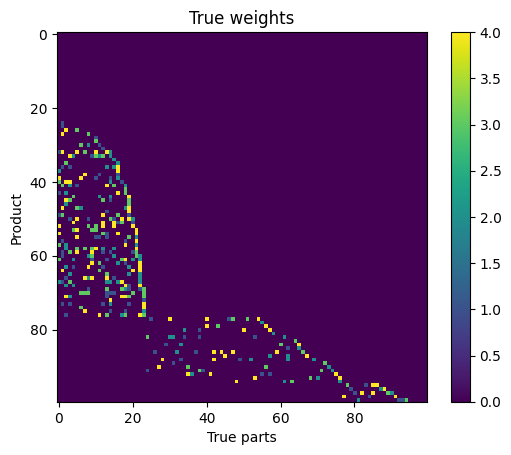

In [3]:
from scipy.sparse import csr_matrix 

# true relationships
row_idx = [prod2idx[p] for p in prod_graph['dest'].values]
col_idx = [prod2idx[p] for p in prod_graph['source'].values]
m = csr_matrix((prod_graph['units'].values, (row_idx, col_idx)), shape=(len(products), len(products))).toarray()
pos = plt.imshow(m)
plt.ylabel('Product')
plt.xlabel('True parts')
plt.colorbar(pos)
plt.title('True weights')
plt.show()

In [4]:
# standard setting, all transactions
transactions = pd.read_csv('./standard_setting_all_transactions.csv')
transactions.head()

supplier_id  buyer_id  product_id  amount  time
0            0        49           8    16.0     3
1            0        70           8    24.0     3
2            0        99           8    72.0     3
3            0       208           8    24.0     3
4            2        28          15     6.0     3

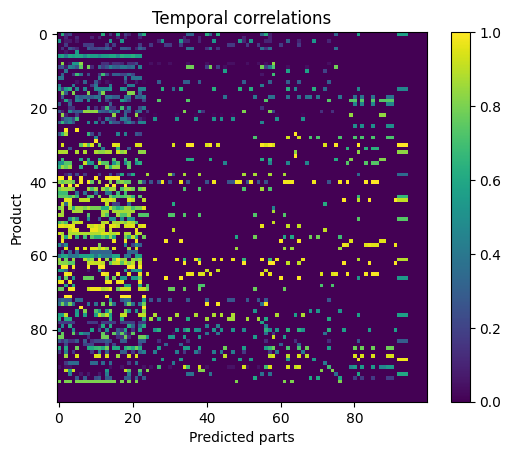

In [5]:
# test temporal correlations baseline
corr_m = predict_product_relations_with_corr(transactions, products)
pos = plt.imshow(corr_m, vmin=0)
plt.ylabel('Product')
plt.xlabel('Predicted parts')
plt.colorbar(pos)
plt.title('Temporal correlations')
plt.show()

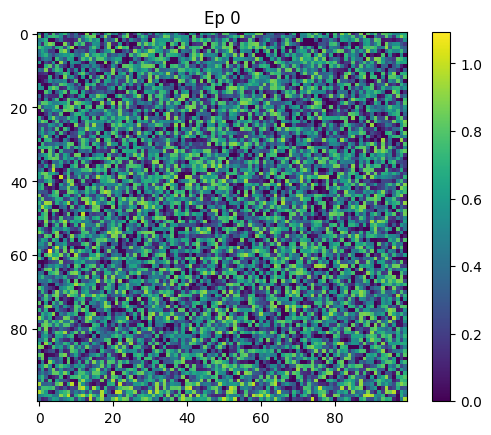

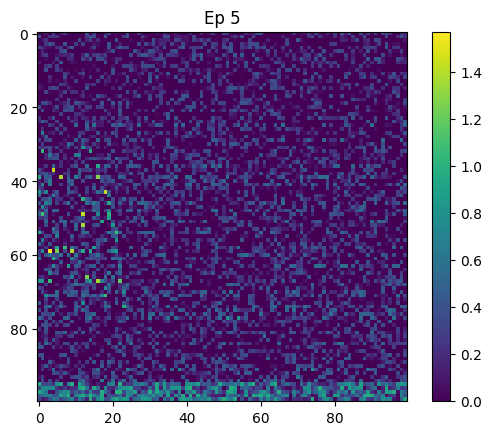

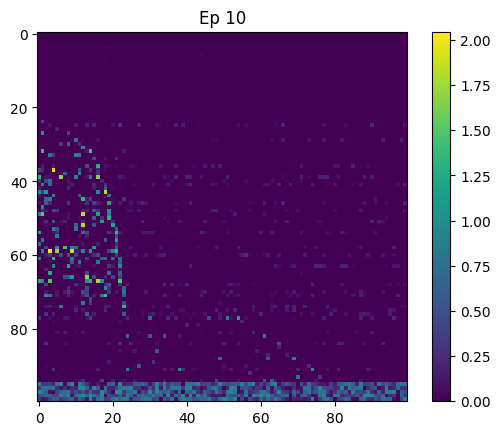

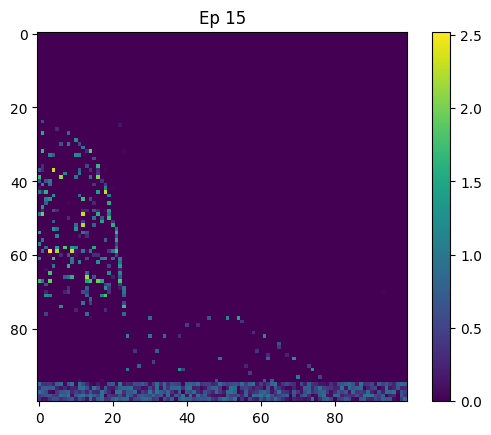

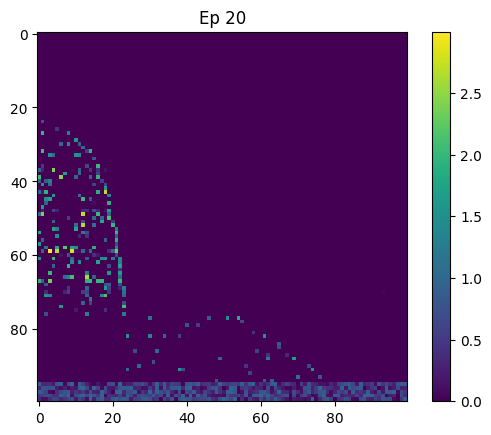

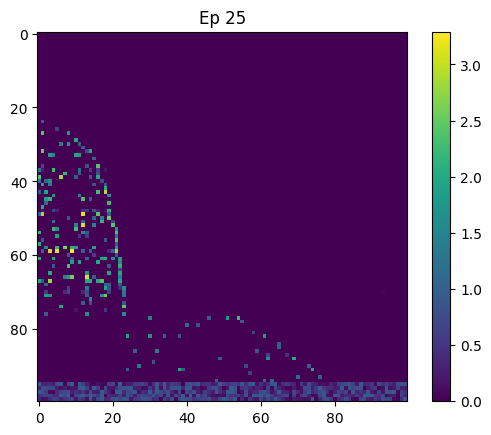

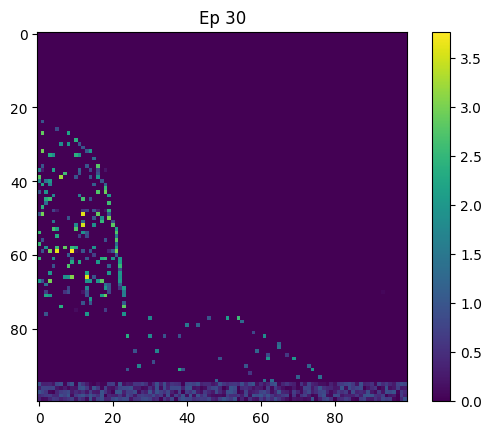

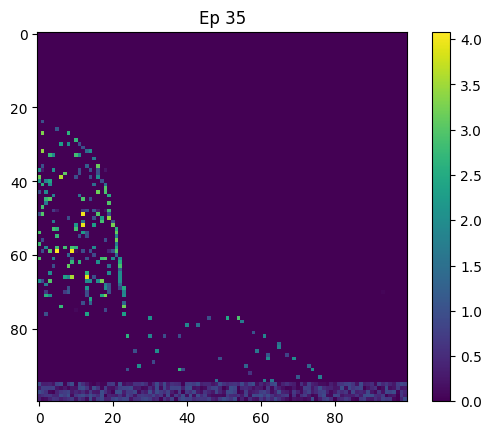

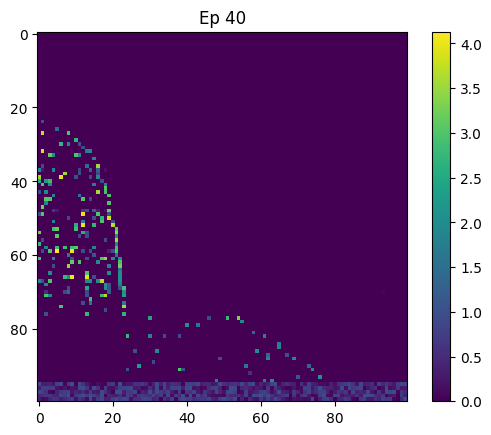

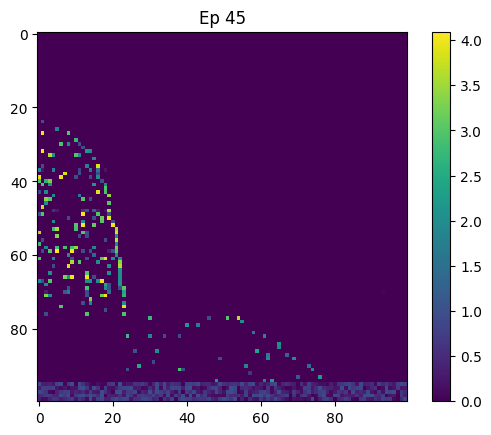

In [6]:
losses_1, maps_1, inv_m_1 = predict_product_relations_with_inventory_module(
    transactions, firms, products, prod2idx, prod_graph)

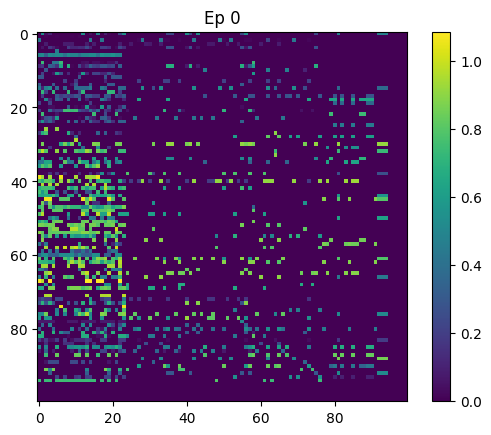

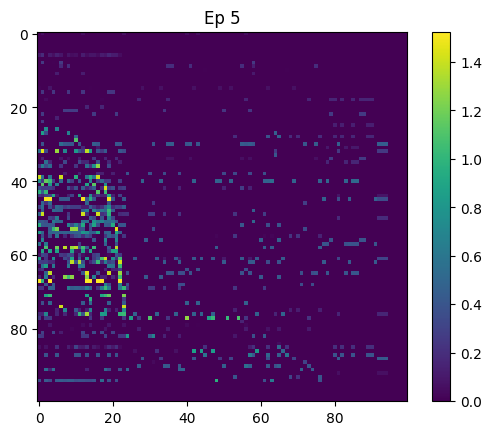

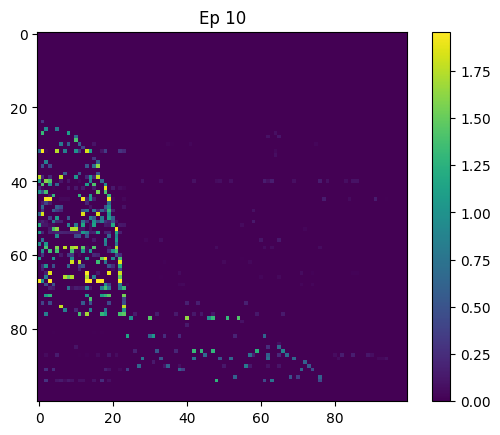

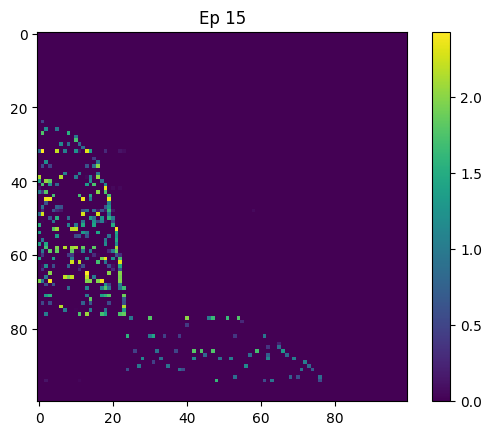

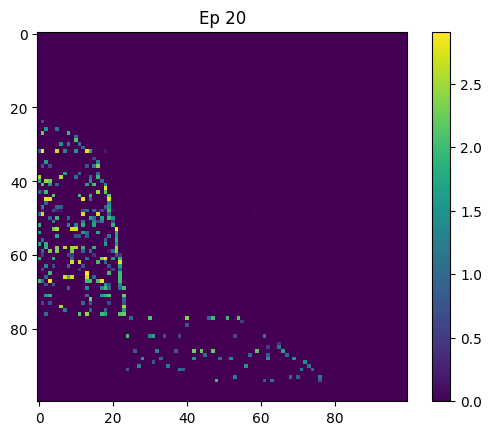

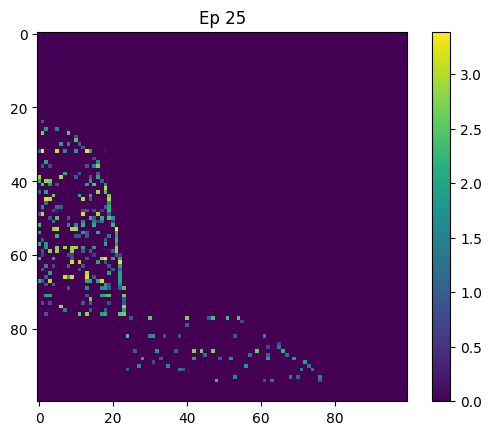

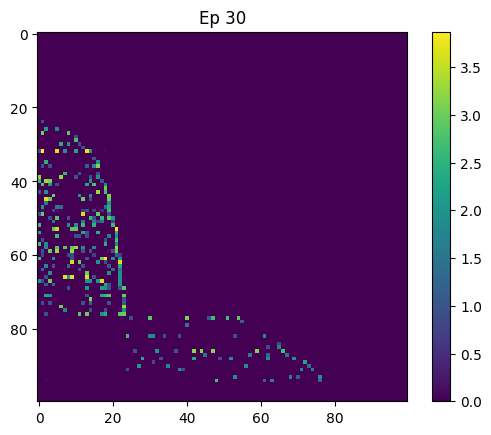

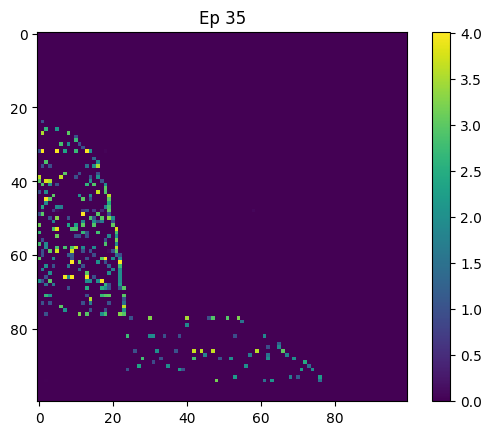

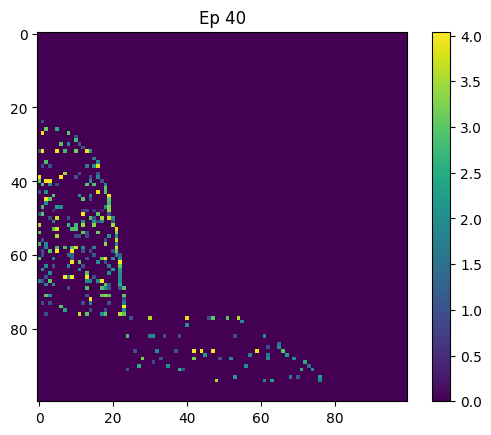

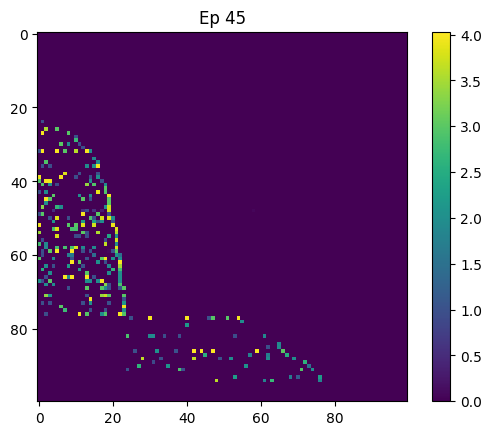

In [7]:
# initialize inventory module with correlations
losses_2, maps_2, inv_m_2 = predict_product_relations_with_inventory_module(
    transactions, firms, products, prod2idx, prod_graph, init_m=corr_m)

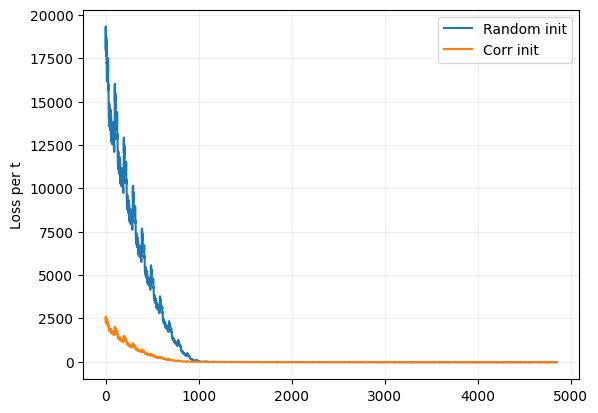

In [8]:
plt.plot(losses_1, label='Random init')
plt.plot(losses_2, label='Corr init')
plt.ylabel('Loss per t')
plt.legend()
plt.grid(alpha=0.2)

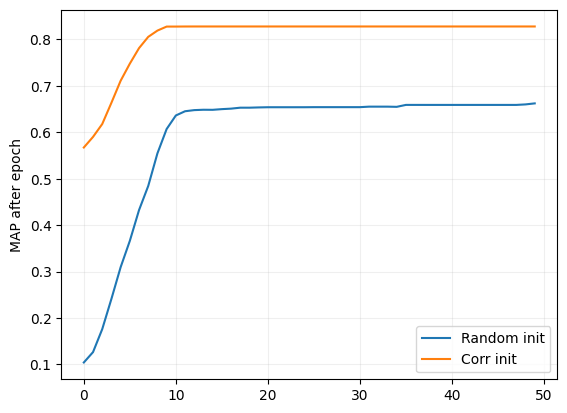

In [9]:
plt.plot(maps_1, label='Random init')
plt.plot(maps_2, label='Corr init')
plt.ylabel('MAP after epoch')
plt.legend()
plt.grid(alpha=0.2)

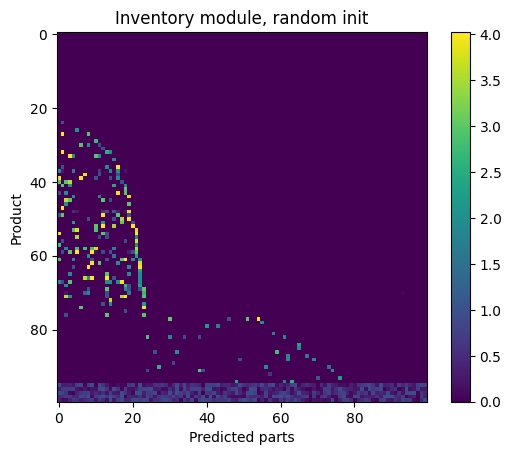

In [10]:
# final epoch - random init
pos = plt.imshow(inv_m_1)
plt.ylabel('Product')
plt.xlabel('Predicted parts')
plt.colorbar(pos)
plt.title('Inventory module, random init')
plt.show()

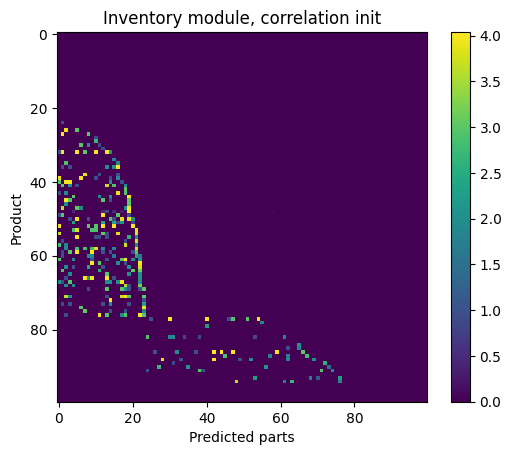

In [11]:
# final epoch - corr init
pos = plt.imshow(inv_m_2)
plt.ylabel('Product')
plt.xlabel('Predicted parts')
plt.colorbar(pos)
plt.title('Inventory module, correlation init')
plt.show()

In [12]:
corr_map = mean_average_precision(prod_graph, prod2idx, corr_m, verbose=False)
print(f'Temporal correlations: MAP={corr_map:.4f}')
inv_map_1 = mean_average_precision(prod_graph, prod2idx, inv_m_1, verbose=False)
print(f'Inventory module: MAP={inv_map_1:.4f}')
inv_map_2 = mean_average_precision(prod_graph, prod2idx, inv_m_2, verbose=False)
print(f'Inventory module, initialized with corr: MAP={inv_map_2:.4f}')

Temporal correlations: MAP=0.5051
Inventory module: MAP=0.6622
Inventory module, initialized with corr: MAP=0.8279


In [13]:
# random baseline
maps = []
for i in range(100):
    np.random.seed(i)
    rand_baseline = np.random.random((len(products), len(products)))
    maps.append(mean_average_precision(prod_graph, prod2idx, rand_baseline, verbose=False))
print(f'Random baseline: MAP mean={np.mean(maps):.4f}, std={np.std(maps):.4f}')

Random baseline: MAP mean=0.0860, std=0.0091


In [14]:
# initialize inventory module with correlations
losses_2, maps_2, inv_m_2 = predict_product_relations_with_inventory_module(
    transactions, firms, products, prod2idx, prod_graph, init_m=corr_m, visualize_weights=False)
maps_2[-1]

0.8279401533700291

# Deprecated

In [3]:
# small synthetic data, no temporal change
DATA = 'tgbl-hypergraph_synthetic'
DATA_DIR = f"/lfs/turing1/0/{os.getlogin()}/supply-chains/TGB/tgb/datasets/{DATA.replace('-', '_')}/"
products = [f'product{i}' for i in range(0, 100)]
prod2idx = {p:i for i,p in enumerate(products)}
firms = [f'firm{i}' for i in range(1, 301)] 
firm2idx = {f:i for i,f in enumerate(firms)}

## Load data formatted for model

In [2]:
with open(os.path.join(DATA_DIR, f"{DATA}_meta.json"), "r") as file:
    METADATA = json.load(file)
    NUM_NODES = len(METADATA["id2entity"])
METADATA.keys()

dict_keys(['product_threshold', 'id2entity', 'train_max_ts', 'val_max_ts', 'test_max_ts'])

In [3]:
NUM_FIRMS = METADATA["product_threshold"]
NUM_PRODUCTS = NUM_NODES - NUM_FIRMS
NUM_FIRMS, NUM_PRODUCTS

(21, 97)

In [4]:
# load dataset
device = "cpu"
dataset = PyGLinkPropPredDatasetHyper(name=DATA, root="datasets", use_prev_sampling=False)
train_mask = dataset.train_mask
val_mask = dataset.val_mask
test_mask = dataset.test_mask
data = dataset.get_TemporalData()
data = data.to(device)

Dataset tgbl-hypergraph_synthetic url not found, download not supported yet.
file found, skipping download
Dataset directory is  /lfs/turing1/0/serinac/supply-chains/TGB/tgb/datasets/tgbl_hypergraph_synthetic
loading processed file


In [5]:
data

TemporalData(src=[74887], dst=[74887], t=[74887], msg=[74887, 1], prod=[74887], y=[74887])

In [6]:
data.src[:10]

tensor([7, 7, 7, 3, 3, 3, 3, 3, 3, 3])

In [7]:
data.dst[:10]

tensor([ 9, 12,  9, 12,  7, 16, 12, 18, 13,  2])

In [8]:
data.prod[:10]

tensor([ 66,  97,  66, 104, 104, 104, 104, 104, 104, 104])

In [9]:
data.t[:10]

tensor([1, 2, 3, 3, 3, 3, 3, 3, 3, 3])

In [10]:
data.msg

tensor([[ 15.8013],
        [ 37.3296],
        [ 18.0873],
        ...,
        [808.3356],
        [105.8538],
        [879.2071]])

## Load original transactions + production functions

In [90]:
transactions = pd.read_table(os.path.join(DATA_DIR, 'observed_transactions.psv'), sep="|")
min_t = np.min(transactions['time'].values)
max_t = np.max(transactions['time'].values)+1
time_range = range(min_t, max_t)
print(f'Time range: {min_t}-{max_t}')
transactions.head()

Time range: 1-150


time         amt origin_company dest_company    product
0     1   15.801313       company3     company9  product62
1     2   37.329604       company3     company5  product61
2     3   18.087301       company3     company9  product62
3     3   62.191280      company16     company5  product56
4     3  640.205554      company16     company3  product56

In [21]:
# map product name to index in model
product2idx = {}
idx = 0
for i in range(100):
    target_str = f'product{i}'
    if target_str in set(transactions['product']):
        product2idx[target_str] = idx
        idx += 1
    else:
        print('Missing', target_str)

Missing product26
Missing product78
Missing product93


In [22]:
prod_funcs = pd.read_table(os.path.join(DATA_DIR, 'production_fn.psv'), sep="|")
prod_funcs.head()

product                                          prod_func
0  company0-product93  0.391(company16-product56)+ 0.197(company17-pr...
1  company0-product89  0.734(company1-product23)+ 0.881(company16-pro...
2  company0-product18  2.848174813753853 x (company16-product62)^0.48...
3  company0-product95                    min{(company5-product25)/0.386}
4  company0-product65  0.488(company0-product44)+ 0.279(company12-pro...

In [34]:
# companies use the same input products but different functions
prod_funcs[prod_funcs['product'].str.contains('product21')]

product                                          prod_func
68    company3-product21  3.2727741616368444 x (company16-product8)^0.16...
143   company9-product21  0.556(company16-product8)+ 0.822(company7-prod...
223  company16-product21  0.415(company16-product8)+ 0.724(company16-pro...
255  company17-product21  7.987231531265883 x (company16-product8)^0.115...
274  company19-product21  min{(company16-product8)/0.776, (company0-prod...

# Test inventory module

## Train model

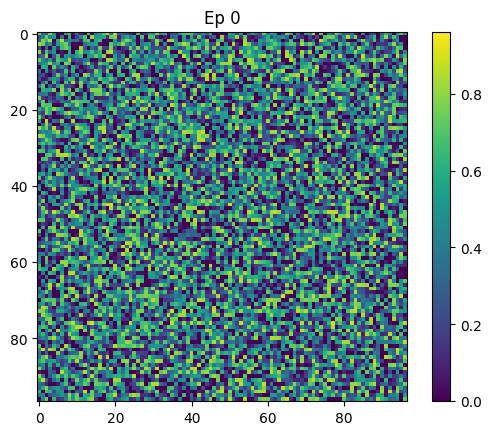

0 14365936.390625
1 10366018.59375
2 7002563.5
3 4272113.63671875
4 2213684.82421875


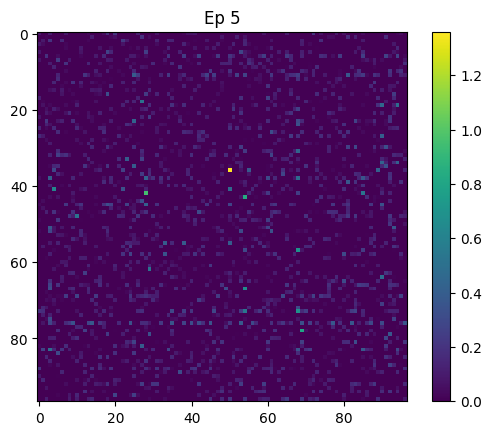

5 865321.8725585938
6 172861.70776367188
7 10447.829435884953
8 -8287.191646575928
9 -10505.153030395508


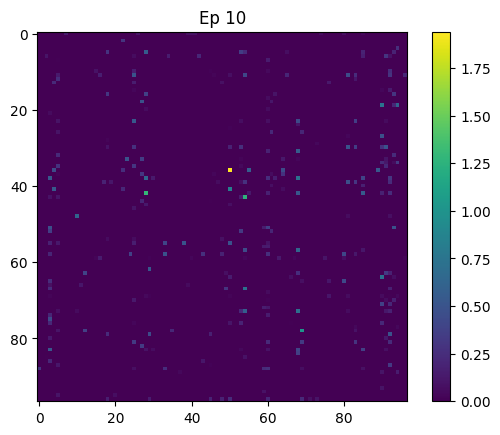

10 -13130.892784118652
11 -11399.240802764893
12 -13900.116188049316
13 -12573.31611251831
14 -14139.136932373047


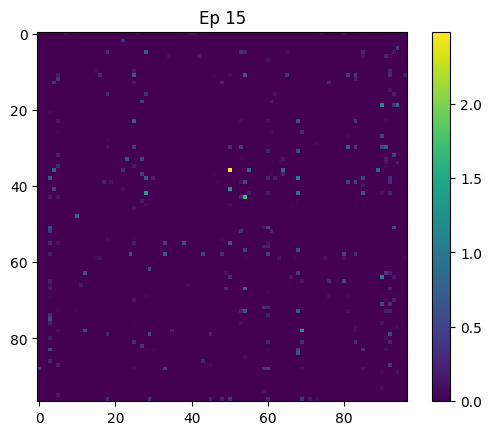

15 -12591.285869598389
16 -13514.89875793457
17 -12934.794509887695
18 -14215.238208770752
19 -14322.358675956726


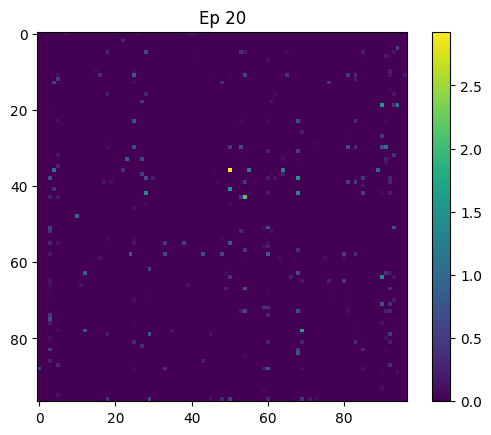

20 -14658.053121566772
21 -14336.282135009766
22 -15020.669409871101
23 -13464.24927520752
24 -15746.990440368652


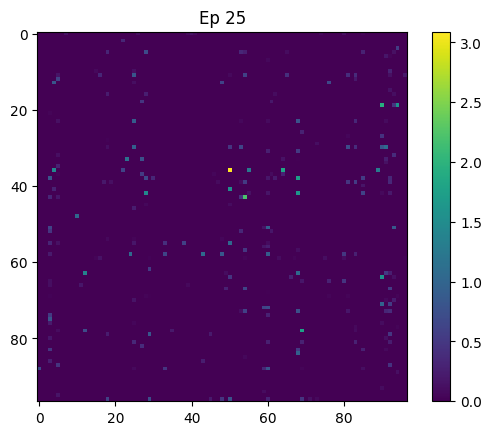

25 -13583.325471282005
26 -14230.68960571289
27 -14432.193659424782
28 -16158.9768409729
29 -12633.446037452668


In [43]:
module = TGNPLInventory(NUM_FIRMS, NUM_PRODUCTS, learn_att_direct=True)
opt = torch.optim.Adam(module.parameters())
losses = []
for ep in range(0, 30):
    for t in range(1, 150):
        to_keep = data.t == t
        src = data.src[to_keep]
        dst = data.dst[to_keep]
        prod = data.prod[to_keep]
        msg = data.msg[to_keep].reshape(-1, 1)
        
        opt.zero_grad()
        loss, debt_loss, cons_loss = module(src, dst, prod, msg)
        loss.backward(retain_graph=False)
        opt.step()
        module.detach()
        losses.append(float(loss))
    if (ep % 5) == 0:
        weights = module._get_prod_attention().detach().numpy()
        pos = plt.imshow(weights)
        plt.colorbar(pos)
        plt.title('Ep %d' % ep)
        plt.show()
    print(ep, np.sum(losses[-100:]))
    module.reset()  # reset inventory

Text(0, 0.5, 'Loss per t')

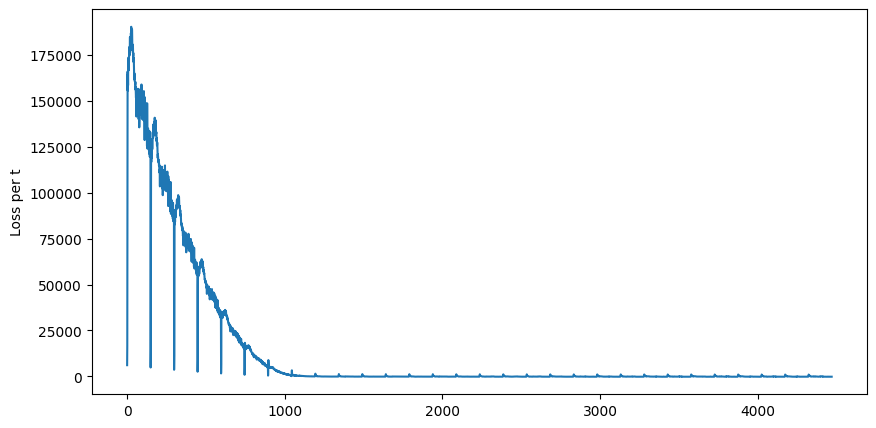

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.ylabel('Loss per t')

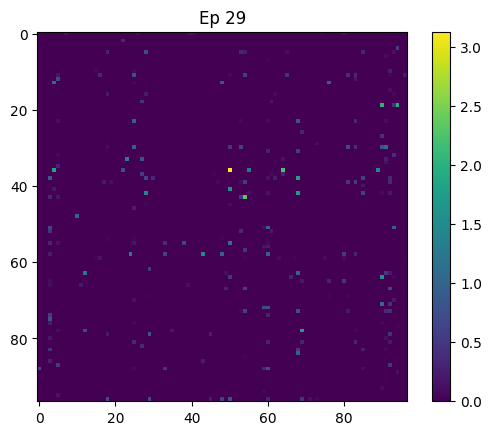

In [45]:
# final epoch
weights = module._get_prod_attention().detach().numpy()
pos = plt.imshow(weights)
plt.colorbar(pos)
plt.title('Ep %d' % ep)
plt.show()

255 0.027101711127643747


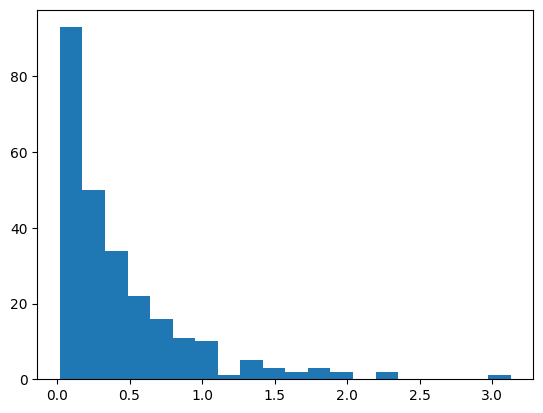

In [46]:
nonzero_weights = weights[weights > 0]
print(len(nonzero_weights), len(nonzero_weights) / (NUM_PRODUCTS * NUM_PRODUCTS))
plt.hist(nonzero_weights, bins=20)
plt.show()

## Compare learned function to ground-truth function

In [37]:
# find dest productions with most transactions
num_trans = transactions.groupby('product').size()
dest_prods = [p for p in prod_graph.dest.unique() if p in num_trans.index.values]
num_trans = num_trans.loc[dest_prods]
num_trans.sort_values(ascending=False).head(10)

product
product33    900
product37    750
product87    750
product42    750
product94    750
product83    749
product21    746
product34    745
product15    745
product7     600
dtype: int64

In [87]:
from scipy.stats import pearsonr, spearmanr 

def classify_func(prod_func):
    if 'exo' in prod_func:
        return 'ExoProd'
    if 'min' in prod_func:
        return 'Div'
    if 'x' in prod_func:
        return 'Mult'
    return 'Linear'

def convert_txns_to_timeseries(txns_df, min_t, max_t):
    sums_per_t = txns_df.groupby('time')['amt'].sum()
    ts = []
    for t in range(min_t, max_t):
        if t in sums_per_t.index:
            ts.append(sums_per_t.loc[t])
        else:
            ts.append(0)
    return ts

def get_temporal_corr(buy_ts, supp_ts, lag=0, corr_func=pearsonr):
    if lag > 0:
        lagged_buy_ts = buy_ts[:len(buy_ts)-lag]
        lagged_supp_ts = supp_ts[lag:]
    else:
        lagged_buy_ts = buy_ts
        lagged_supp_ts = supp_ts
    assert len(lagged_buy_ts) == len(lagged_supp_ts)
    return corr_func(lagged_buy_ts, lagged_supp_ts)

def get_best_corr_with_lag(buy_ts, supp_ts, max_lag=7):
    best_corr = -1
    best_lag = -1
    for lag in range(7):
        r,p = get_temporal_corr(buy_ts, supp_ts, lag=lag, corr_func=pearsonr)
        if r > best_corr:
            best_corr = r
            best_lag = lag
    return best_corr, best_lag

In [101]:
def eval_corr_in_transactions(prod):
    # get true sources
    true_sources = sorted(prod_graph[prod_graph['dest'] == prod]['source'].values)
    print('True sources', true_sources)    
    prod_txns = transactions[transactions['product'] == prod]  # transactions of this product
    
    # compare supply time series and buy time series per supplier
    for supp, supp_df in prod_txns.groupby('origin_company'):
        prod_fn = prod_funcs[prod_funcs['product'] == f'{supp}-{prod}']
        assert len(prod_fn) == 1
        prod_func = prod_fn.iloc[0].prod_func
        print('\nSUPPLIER COMPANY', supp)
        print(classify_func(prod_func), ':', prod_func)  # print true production function
        
        fig, axes = plt.subplots(1, 2, figsize=(10, 3.5))
        fig.suptitle(supp, fontsize=12)
        # plot time series
        ax = axes[0]
        supp_ts = convert_txns_to_timeseries(supp_df, min_t, max_t)
        ax.plot(time_range, supp_ts, label=f'supply {prod}')
        buy_df = transactions[transactions['dest_company'] == supp]
        pos_corrs = []
        for src in true_sources:
            buy_ts = convert_txns_to_timeseries(buy_df[buy_df['product'] == src], min_t, max_t)
            best_corr, best_lag = get_best_corr_with_lag(buy_ts, supp_ts)
            pos_corrs.append(best_corr)
            print('buy %s, supply %s -> best corr = %.3f, lag = %d' % (src, prod, best_corr, best_lag))
            ax.plot(time_range, buy_ts, label=f'buy {src}')
        ax.legend()
        
        # plot correlations
        other_prods_bought = list(set(buy_df['product'].unique()) - set(true_sources))
        neg_corrs = []
        if len(other_prods_bought) > 0:
            print(f'Found {len(other_prods_bought)} OTHER prods bought by {supp}')
            for src in other_prods_bought:
                buy_ts = convert_txns_to_timeseries(buy_df[buy_df['product'] == src], min_t, max_t)
                best_corr, best_lag = get_best_corr_with_lag(buy_ts, supp_ts)
                neg_corrs.append(best_corr)
        ax = axes[1]
        ax.hist(neg_corrs, color='blue', bins=20)
        ymin, ymax = ax.get_ylim()
        ax.vlines(pos_corrs, ymin, ymax, color='red')
        plt.show()

True sources ['product12', 'product53', 'product57']

SUPPLIER COMPANY company1
Linear : 0.426(company16-product12)+ 0.843(company9-product53)+ 0.696(company11-product57)
buy product12, supply product33 -> best corr = 0.692, lag = 3
buy product53, supply product33 -> best corr = 0.999, lag = 0
buy product57, supply product33 -> best corr = 0.478, lag = 4
Found 23 OTHER prods bought by company1


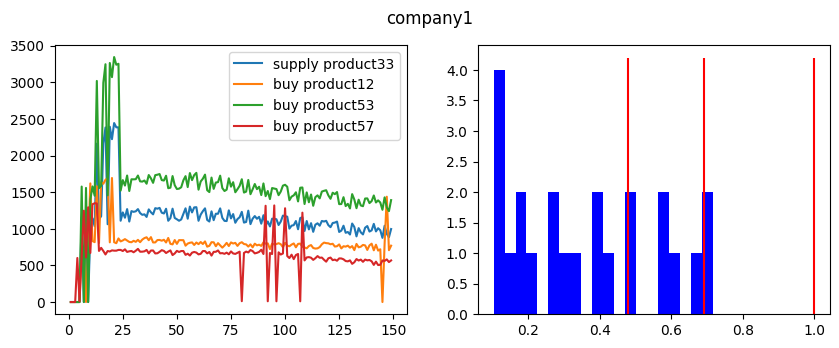


SUPPLIER COMPANY company17
Mult : 5.743850566203784 x (company16-product12)^0.122 x (company9-product53)^0.429 x (company11-product57)^0.448
buy product12, supply product33 -> best corr = 0.525, lag = 0
buy product53, supply product33 -> best corr = 0.777, lag = 0
buy product57, supply product33 -> best corr = 0.573, lag = 0
Found 15 OTHER prods bought by company17


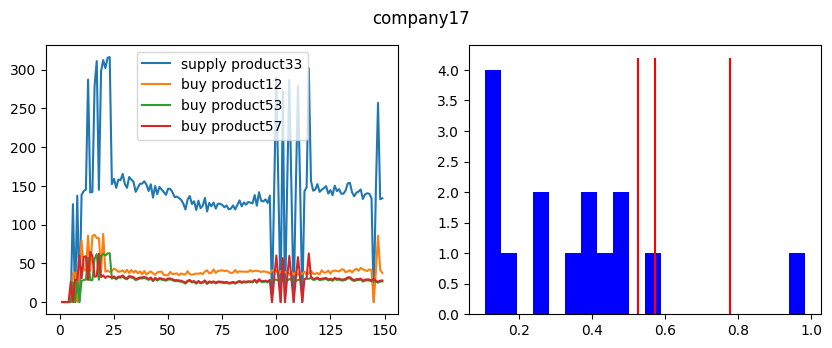


SUPPLIER COMPANY company3
Mult : 5.202204680893029 x (company16-product12)^0.202 x (company9-product53)^0.398 x (company11-product57)^0.400
buy product12, supply product33 -> best corr = 0.556, lag = 0
buy product53, supply product33 -> best corr = 0.773, lag = 0
buy product57, supply product33 -> best corr = 0.553, lag = 0
Found 27 OTHER prods bought by company3


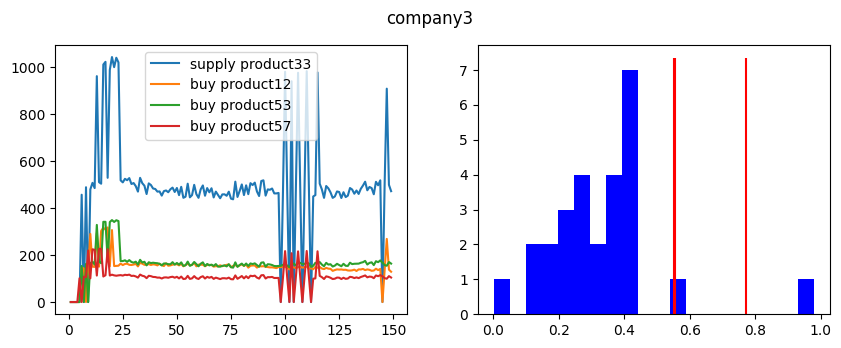


SUPPLIER COMPANY company9
Div : min{(company16-product12)/0.497, (company9-product53)/0.460, (company11-product57)/0.247}
buy product12, supply product33 -> best corr = 0.541, lag = 0
buy product53, supply product33 -> best corr = -1.000, lag = -1
buy product57, supply product33 -> best corr = 0.564, lag = 0
Found 14 OTHER prods bought by company9


/lfs/local/0/serinac/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


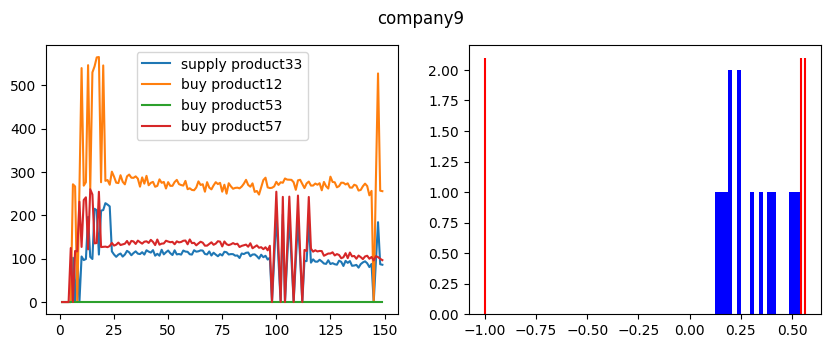

In [102]:
eval_corr_in_transactions('product33')

True sources ['product23', 'product27', 'product40', 'product85']

SUPPLIER COMPANY company19
Linear : 0.511(company16-product40)+ 0.223(company15-product85)+ 0.426(company1-product23)+ 0.880(company17-product27)
supply product37, buy product23 -> best corr = -1.000, lag = -1
supply product37, buy product27 -> best corr = 1.000, lag = 0
supply product37, buy product40 -> best corr = 0.362, lag = 1
supply product37, buy product85 -> best corr = 0.445, lag = 2
Found 21 OTHER prods bought by company19


/lfs/local/0/serinac/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


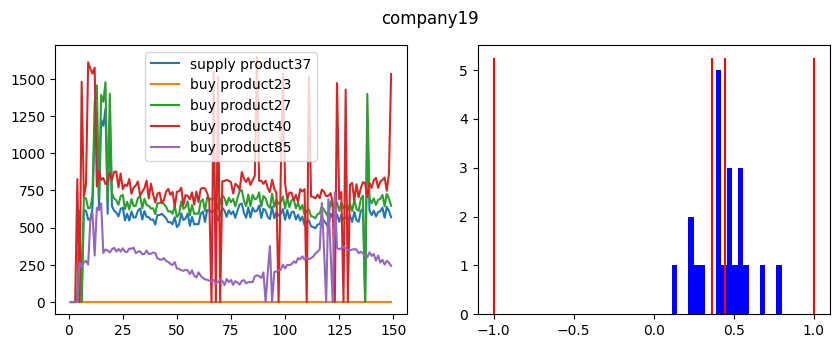


SUPPLIER COMPANY company3
Div : min{(company1-product27)/0.613, (company9-product40)/0.427, (company1-product23)/0.298, (company3-product85)/0.637}
supply product37, buy product23 -> best corr = 0.509, lag = 0
supply product37, buy product27 -> best corr = 0.423, lag = 0
supply product37, buy product40 -> best corr = 0.313, lag = 3
supply product37, buy product85 -> best corr = 0.422, lag = 0
Found 26 OTHER prods bought by company3


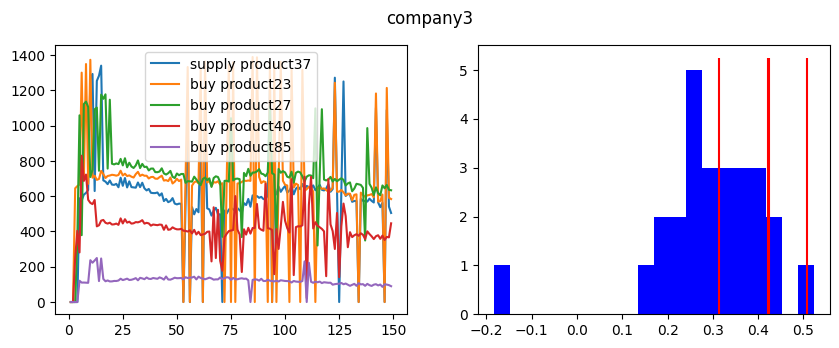


SUPPLIER COMPANY company5
Div : min{(company0-product23)/0.760, (company15-product85)/0.330, (company9-product40)/0.353, (company17-product27)/0.214}
supply product37, buy product23 -> best corr = 0.795, lag = 0
supply product37, buy product27 -> best corr = 0.376, lag = 3
supply product37, buy product40 -> best corr = 0.413, lag = 0
supply product37, buy product85 -> best corr = 0.334, lag = 3
Found 9 OTHER prods bought by company5


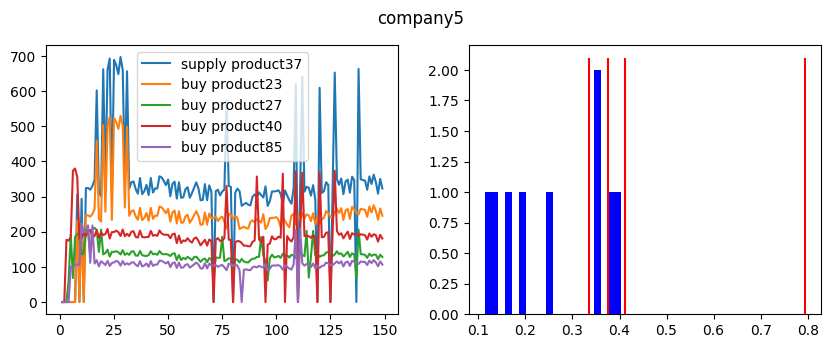

In [100]:
eval_corr_in_transactions('product37')

['product12', 'product53', 'product57']
32 [12, 52, 56]
[0. 0. 0.]


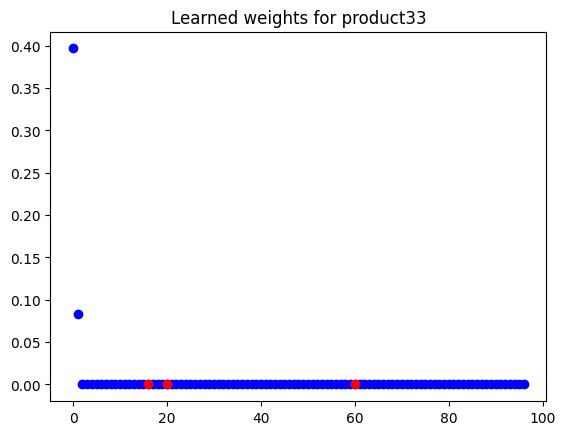

In [51]:
prod = 'product33'
true_sources = sorted(prod_graph[prod_graph['dest'] == prod]['source'].values)
print(true_sources)
row_idx = product2idx[prod]
col_idxs = [product2idx[s] for s in true_sources]
print(row_idx, col_idxs)

# plot learned weights, sorted by weight size
row_weights = weights[row_idx]
print(row_weights[col_idxs])
order = np.argsort(-row_weights)  # descending order
idx2order = {idx:n for n, idx in enumerate(order)}
plt.title(f'Learned weights for {prod}', fontsize=12)
plt.scatter(np.arange(len(row_weights)), row_weights[order], color="blue")
plt.scatter([idx2order[c] for c in col_idxs], row_weights[col_idxs], color="red")
plt.show()

['product23', 'product27', 'product40', 'product85']
36 [23, 26, 39, 83]
[0. 0. 0. 0.]


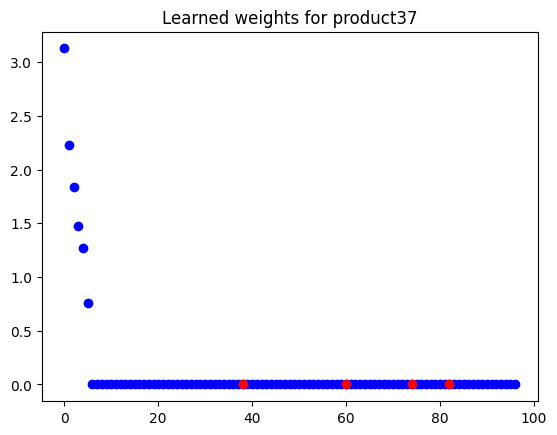

In [52]:
prod = 'product37'
true_sources = sorted(prod_graph[prod_graph['dest'] == prod]['source'].values)
print(true_sources)
row_idx = product2idx[prod]
col_idxs = [product2idx[s] for s in true_sources]
print(row_idx, col_idxs)

# plot learned weights, sorted by weight size
row_weights = weights[row_idx]
print(row_weights[col_idxs])
order = np.argsort(-row_weights)  # descending order
idx2order = {idx:n for n, idx in enumerate(order)}
plt.title(f'Learned weights for {prod}', fontsize=12)
plt.scatter(np.arange(len(row_weights)), row_weights[order], color="blue")
plt.scatter([idx2order[c] for c in col_idxs], row_weights[col_idxs], color="red")
plt.show()

In [49]:
prod = 'product37'
true_sources = sorted(prod_graph[prod_graph['dest'] == prod]['source'].values)
print(true_sources)
row_idx = product2idx[prod]
col_idxs = [product2idx[s] for s in true_sources]
print(row_idx, col_idxs)

['product23', 'product27', 'product40', 'product85']
36 [23, 26, 39, 83]
